# Employee Attrition Prediction Using Machine Learning Decision Trees

## Task 1: Exploratory Data Analysis (EDA)

Let's start by loading the dataset and performing initial data exploration.

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from IPython.display import Image
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # Set to retina version
pd.set_option('display.max_columns', None) # Set max columns output
warnings.filterwarnings('ignore')

**Overview of the Data Set**

In [232]:
df = pd.read_csv("employee_attrition_dataset.csv")
print(df.shape)
display(df.head())

(1470, 35)


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

By overview of data set, it can be found that this data set includes 1470 observations and 35 features. But features 'Over18', 'EmployeeCount' and 'StandardHours' are exactly same in every row, whereas 'EmployeeNumber' is the number tag for employees. We can drop these columns because they do not affect employee attrition.

In [233]:
df = df.drop(columns=['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeNumber'])

According to description page of data set, we can sign the category of some categorical features.

https://developer.ibm.com/patterns/data-science-life-cycle-in-action-to-solve-employee-attrition-problem/

https://www.kaggle.com/datasets/patelprashant/employee-attrition/data

In [234]:
education_map = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
education_satisfaction_map = {1: 'Low', 2:'Medium', 3:'High', 4:'Very High'}
job_involvement_map = {1: 'Low', 2:'Medium', 3:'High', 4:'Very High'}
job_satisfaction_map = {1: 'Low', 2:'Medium', 3:'High', 4:'Very High'}
performance_rating_map = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
relationship_satisfaction_map = {1: 'Low', 2:'Medium', 3:'High', 4:'Very High'}
work_life_balance_map = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
# Use the pandas apply method to numerically encode our attrition target variable
df['Education'] = df["Education"].apply(lambda x: education_map[x])
df['EnvironmentSatisfaction'] = df["EnvironmentSatisfaction"].apply(lambda x: education_satisfaction_map[x])
df['JobInvolvement'] = df["JobInvolvement"].apply(lambda x: job_involvement_map[x])
df['JobSatisfaction'] = df["JobSatisfaction"].apply(lambda x: job_satisfaction_map[x])
df['PerformanceRating'] = df["PerformanceRating"].apply(lambda x: performance_rating_map[x])
df['RelationshipSatisfaction'] = df["RelationshipSatisfaction"].apply(lambda x: relationship_satisfaction_map[x])
df['WorkLifeBalance'] = df["WorkLifeBalance"].apply(lambda x: work_life_balance_map[x])

Then check the data set again.

In [235]:
display(df.head())

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                 1        College  Life Sciences                  Medium   
1                 8  Below College  Life Sciences                    High   
2                 2        College          Other               Very High   
3                 3         Master  Life Sciences               Very High   
4                 2  Below College        Medical                     Low   

   Gender  HourlyRate JobInvolvement  JobLevel                JobRole  \
0  Female          94           High         2        Sales Executive   
1    Male          61         Medium         2     Research Scientist   
2    Male          92         Medium         1  Laboratory Technician   
3  Female          56           High         1     Research Scientist   
4    Male          40           High         1  Laboratory Technician   

  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0       Very High        Single           5993        19479   
1          Medium       Married           5130        24907   
2            High        Single           2090         2396   
3            High       Married           2909        23159   
4          Medium       Married           3468        16632   

   NumCompaniesWorked OverTime  PercentSalaryHike PerformanceRating  \
0                   8      Yes                 11         Excellent   
1                   1       No                 23       Outstanding   
2                   6      Yes                 15         Excellent   
3                   1      Yes                 11         Excellent   
4                   9       No                 12         Excellent   

  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                      Low                 0                  8   
1                Very High                 1                 10   
2                   Medium                 0                  7   
3                     High                 0                  8   
4                Very High                 1                  6   

   TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0             Bad               6                   4   
1                      3          Better              10                   7   
2                      3          Better               0                   0   
3                      3          Better               8                   7   
4                      3          Better               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [236]:
#Show some statistical information about the data
display(df.describe())

Age    DailyRate  DistanceFromHome   HourlyRate     JobLevel  \
count  1470.000000  1470.000000       1470.000000  1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517    65.891156     2.063946   
std       9.135373   403.509100          8.106864    20.329428     1.106940   
min      18.000000   102.000000          1.000000    30.000000     1.000000   
25%      30.000000   465.000000          2.000000    48.000000     1.000000   
50%      36.000000   802.000000          7.000000    66.000000     2.000000   
75%      43.000000  1157.000000         14.000000    83.750000     3.000000   
max      60.000000  1499.000000         29.000000   100.000000     5.000000   

       MonthlyIncome   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  \
count    1470.000000   1470.000000         1470.000000        1470.000000   
mean     6502.931293  14313.103401            2.693197          15.209524   
std      4707.956783   7117.786044            2.498009           3.659938   
min      1009.000000   2094.000000            0.000000          11.000000   
25%      2911.000000   8047.000000            1.000000          12.000000   
50%      4919.000000  14235.500000            2.000000          14.000000   
75%      8379.000000  20461.500000            4.000000          18.000000   
max     19999.000000  26999.000000            9.000000          25.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.000000   
mean         7.008163            4.229252                 2.187755   
std          6.126525            3.623137                 3.222430   
min          0.000000            0.000000                 0.000000   
25%          3.000000            2.000000                 0.000000   
50%          5.000000            3.000000                 1.000000   
75%          9.000000            7.000000                 3.000000   
max         40.000000           18.000000                15.000000   

       YearsWithCurrManager  
count           1470.000000  
mean               4.123129  
std                3.568136  
min                0.000000  
25%                2.000000  
50%                3.000000  
75%                7.000000  
max               17.000000

In [237]:
#Show all the columns in the dataframe
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

**Type of Features**

Take a close look at the type of features.

Categorical;

    Nominal
        Attrition
        BusinessTravel
        Department
        EducationField
        Gender
        JobRole
        MaritalStatus
        OverTime
        
    Ordinal
        Education
        EnvironmentSatisfaction
        JobInvolvement
        JobLevel
        JobSatisfaction
        PerformanceRating
        RelationshipSatisfaction
        StockOptionLevel
        WorkLifeBalance
        
Numerical;
        
    Continuous
        Age
        DailyRate
        DistanceFromHome
        HourlyRate
        MonthlyIncome
        MonthlyRate
        NumCompaniesWorked
        PercentSalaryHike
        TotalWorkingYears
        TrainingTimesLastYear
        YearsAtCompany
        YearsInCurrentRole
        YearsSinceLastPromotion
        YearsWithCurrManager

Let's check whether there are any missing values in the dataset.

In [238]:
print("Missing Value:", df.isnull().any().any())

Missing Value: False


This is a complete data set that contain no missing values.

**Distribution of the Target Variable "Attrition"**

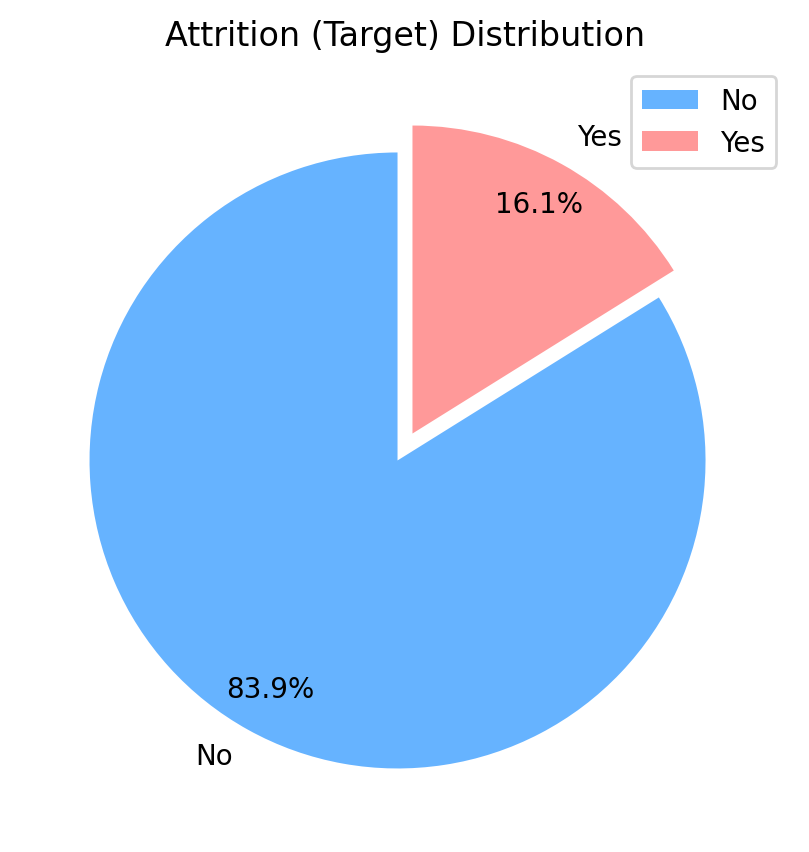

In [239]:
colors = ['#66b3ff', '#ff9999']
explode = (0.05,0.05)
plt.figure(figsize=(5, 5))
plt.pie(df['Attrition'].value_counts(), colors = colors, labels=['No', 'Yes'], 
        autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
plt.legend()
plt.title("Attrition (Target) Distribution")
plt.show()

Note that the distribution of the target variable is quite unbalanced, that is, 16.1% of employees decide to leave but most employees decide to stay. It should be noted that this unbalance may influence the learning model later.

### Frequency Analysis of Numerical Features

The numerical features in these data set are: 'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion' and 'YearsWithCurrManager'. 

Plot the distribution graphs of these features and find some pattern.

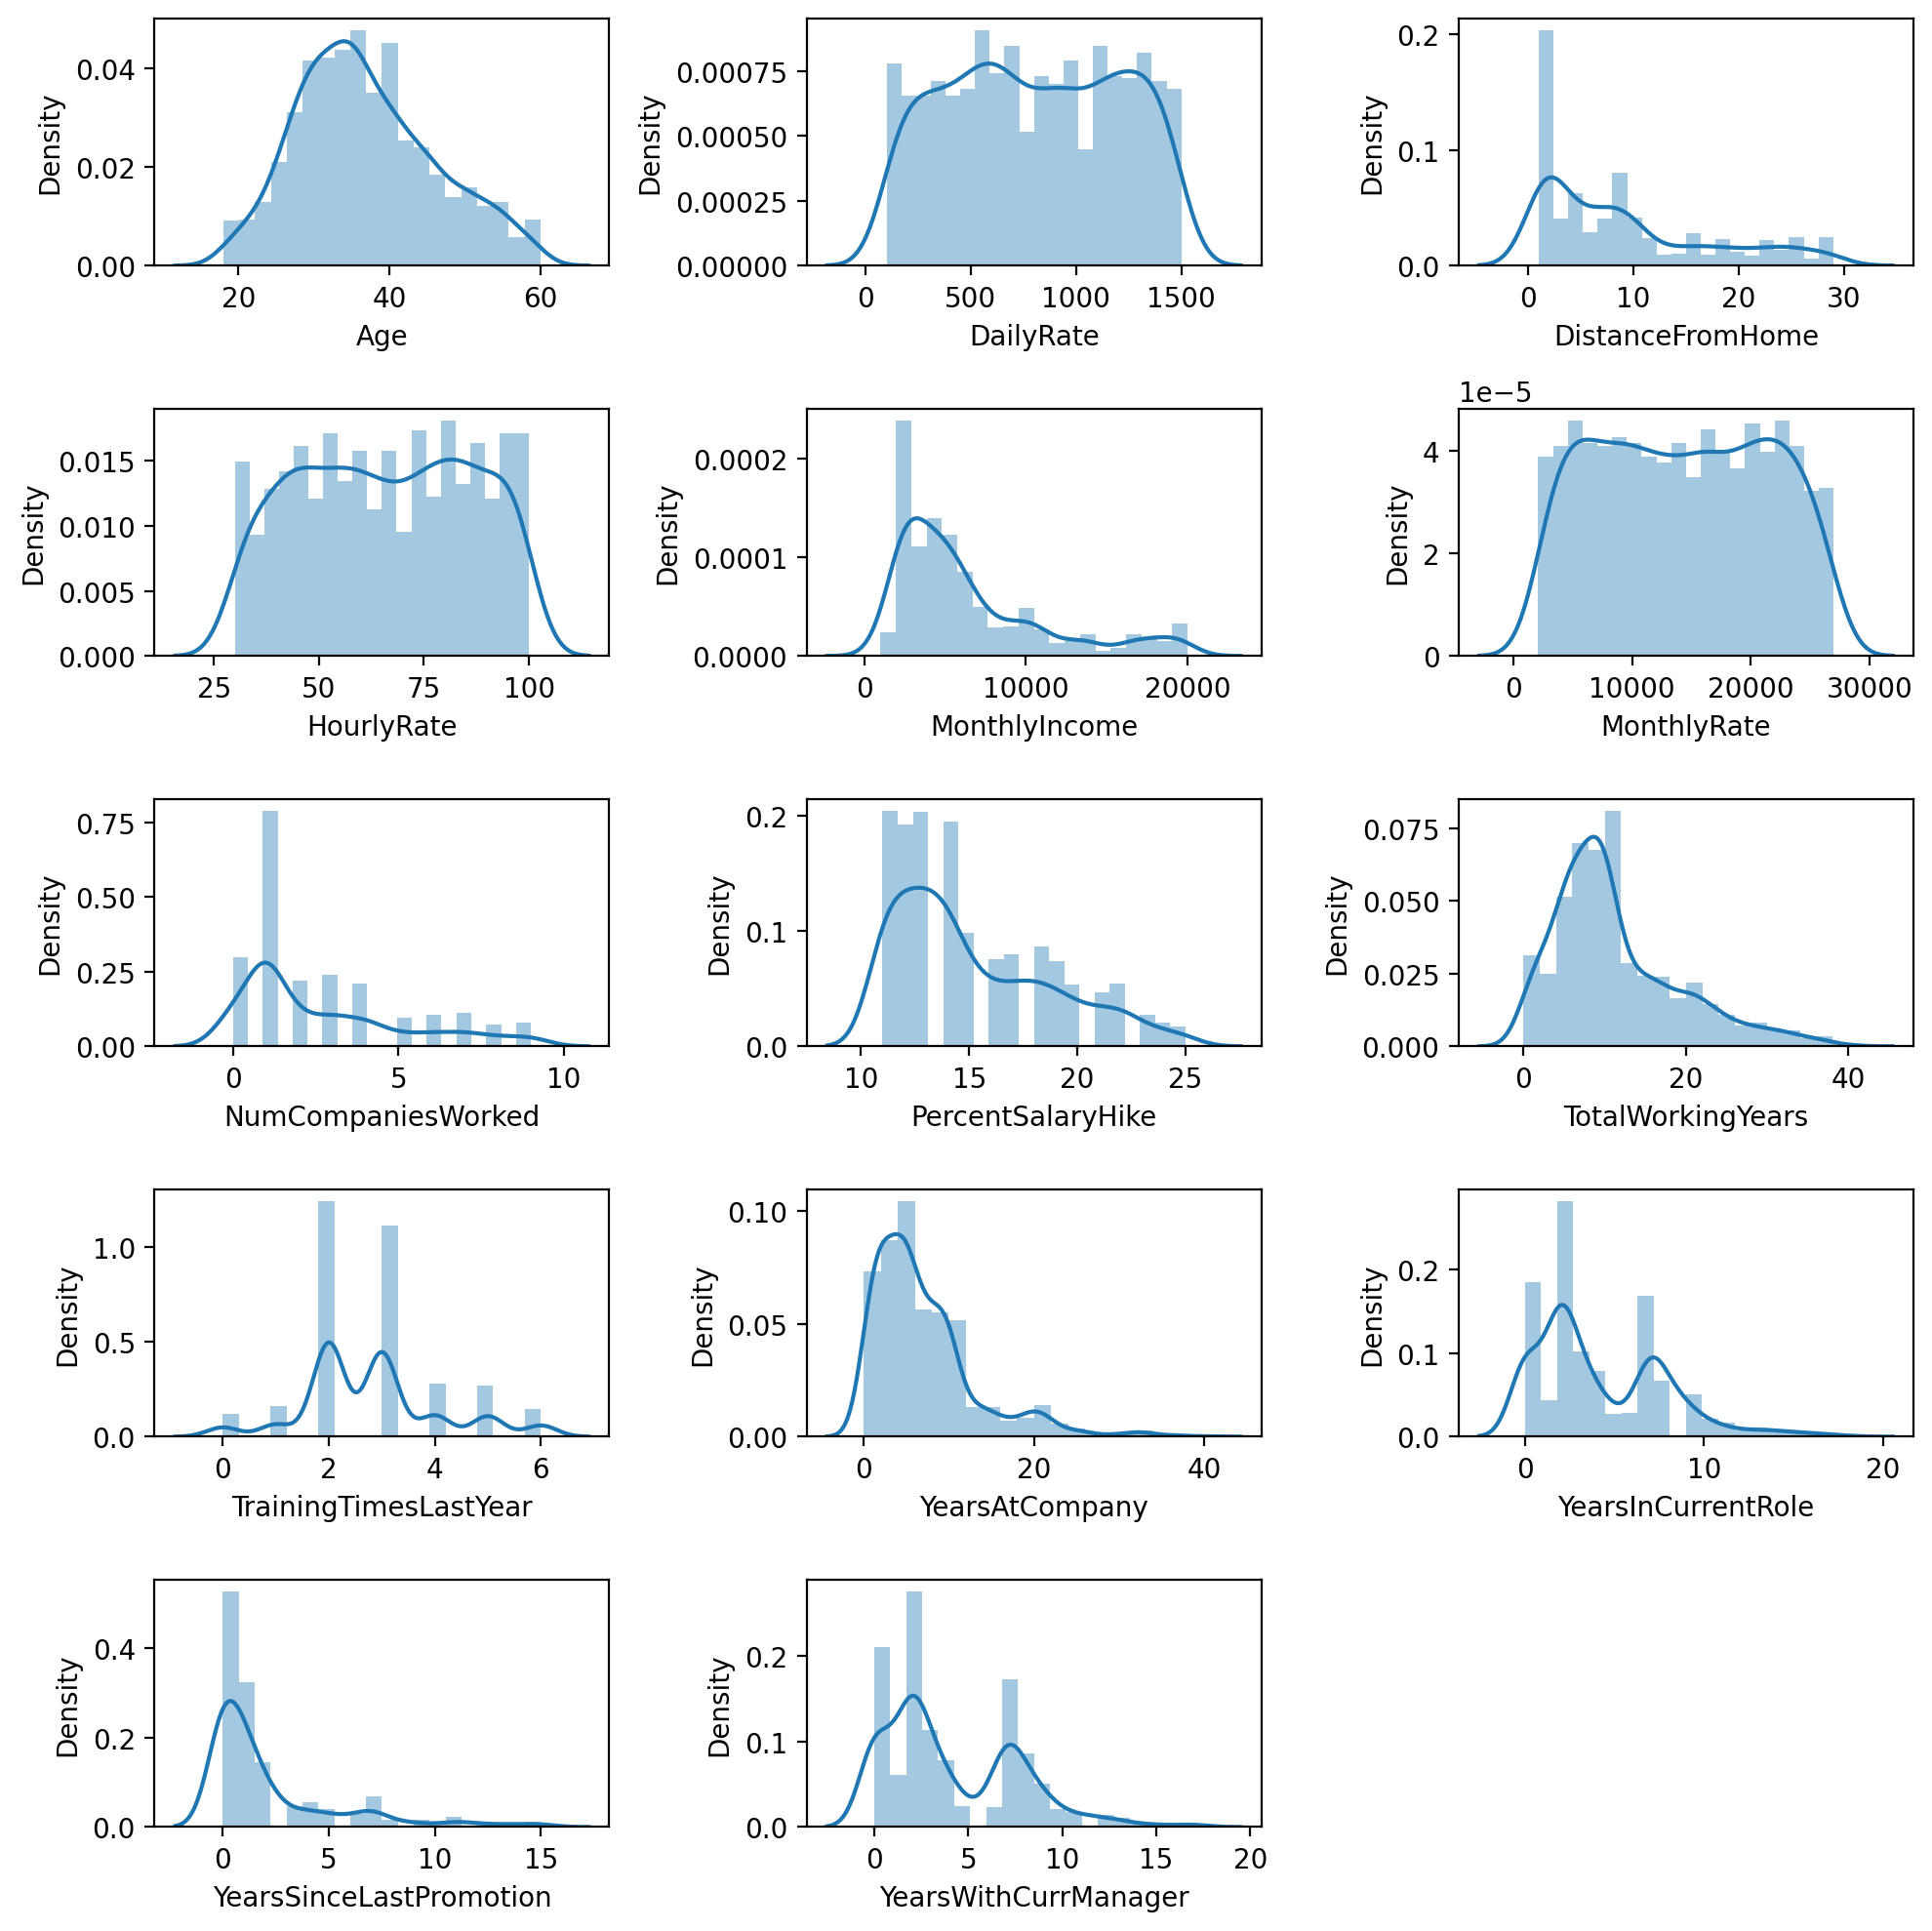

In [240]:
numerical_list = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
                  'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

plt.figure(figsize=(10, 10))
for i, column in enumerate(numerical_list, 1):
    plt.subplot(5, 3, i)
    sns.distplot(df[column], bins=20)
plt.tight_layout()
plt.show()

**Findings of Numerical Features;**

    Age: The age distribution of the dataset distributes normally which covers from 20 to 60. Most employees are 30 to 40.

    DistanceFromHome: Most of employees live close to the company with the most distance still below 10km.

    MonthlyIncome: The majority of monthly income of employees are centred at around 5000. Only a few people get an income over 10000.

    NumCompaniesWorked: Most employees have only worked for one company.

    TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager: These time type features are right skewed which means that most people stay in the company for only for a few years.

    DailyRate, HourlyRate, and MonthlyRate are distributed uniformly which might imply that the figure is similar in different intervals.

### Frequency Analysis of Categorical Features;

Categorical features are: 'Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole','JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel' and 'WorkLifeBalance'. 

First, change the type of nominal features to object in order to process frequency analysis, because some classified variables were signed by integer in original data set. Then, browse the frequency of categorical features in data set.

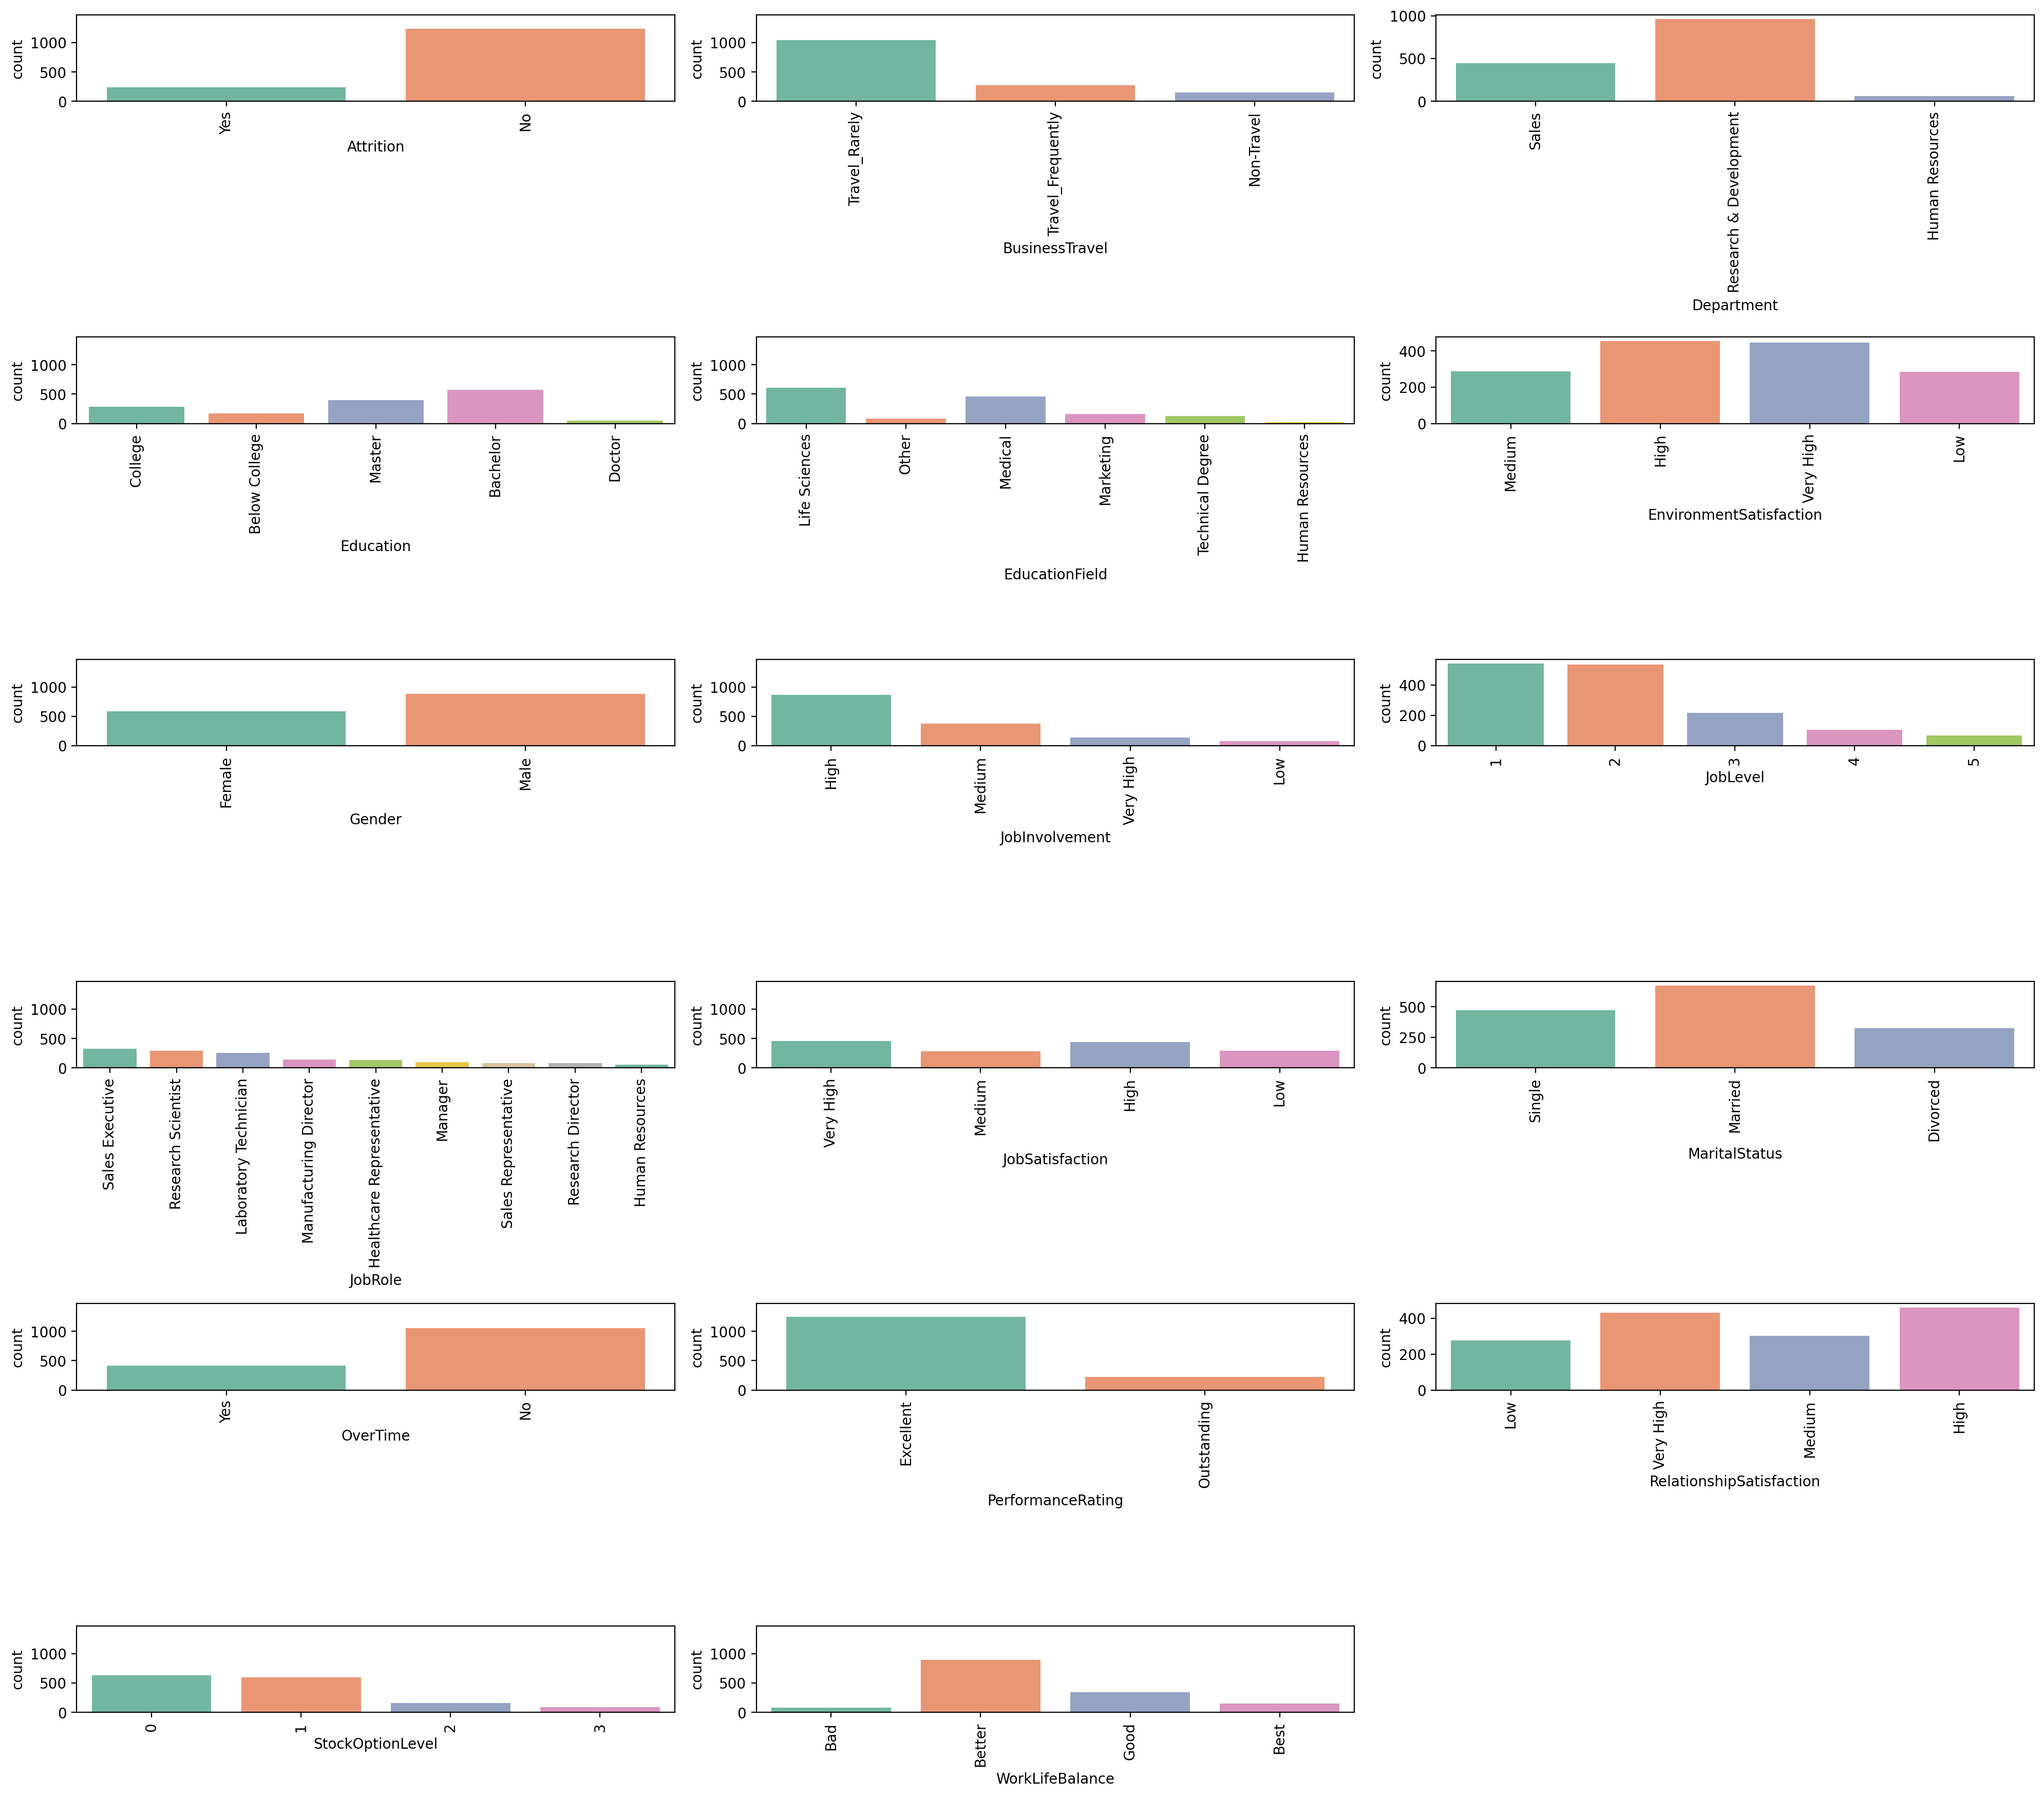

In [241]:
cate_list = ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 
             'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole',
             'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
             'StockOptionLevel', 'WorkLifeBalance']

# Create subplots
plt.figure(figsize=(20, 20))
gridspec = plt.GridSpec(7, 3)
locator1, locator2 = [0, 0]

for column in cate_list:
    plt.subplot(gridspec[locator1, locator2])
    sns.countplot(data=df, x=column, palette='Set2')
    plt.xticks(rotation=90)
    
    locator2 += 1
    if locator2 == 3:
        locator1 += 1
        locator2 = 0
        continue
    if locator1 == 7:
        break

    # Set the y-axis limits to display more values
    plt.ylim(0, len(df))  # You can adjust the range as needed

plt.tight_layout()
plt.show()

**Findings of Categorical Features;**

    In terms of satisfaction (enviroment, job and relationship satisfaction), most of employees are satisfied, of which the number of "3" and "4" indicate high satisfaction are a lot.

    Most employees hold bachelor degree and many people major in life science.

    Since most of employees are relatively new to the company, job level 1 is the majority job level.

    Job involvment is pretty high among employees.

### Correlation Analysis
Plot correlation matrix by heatmap.

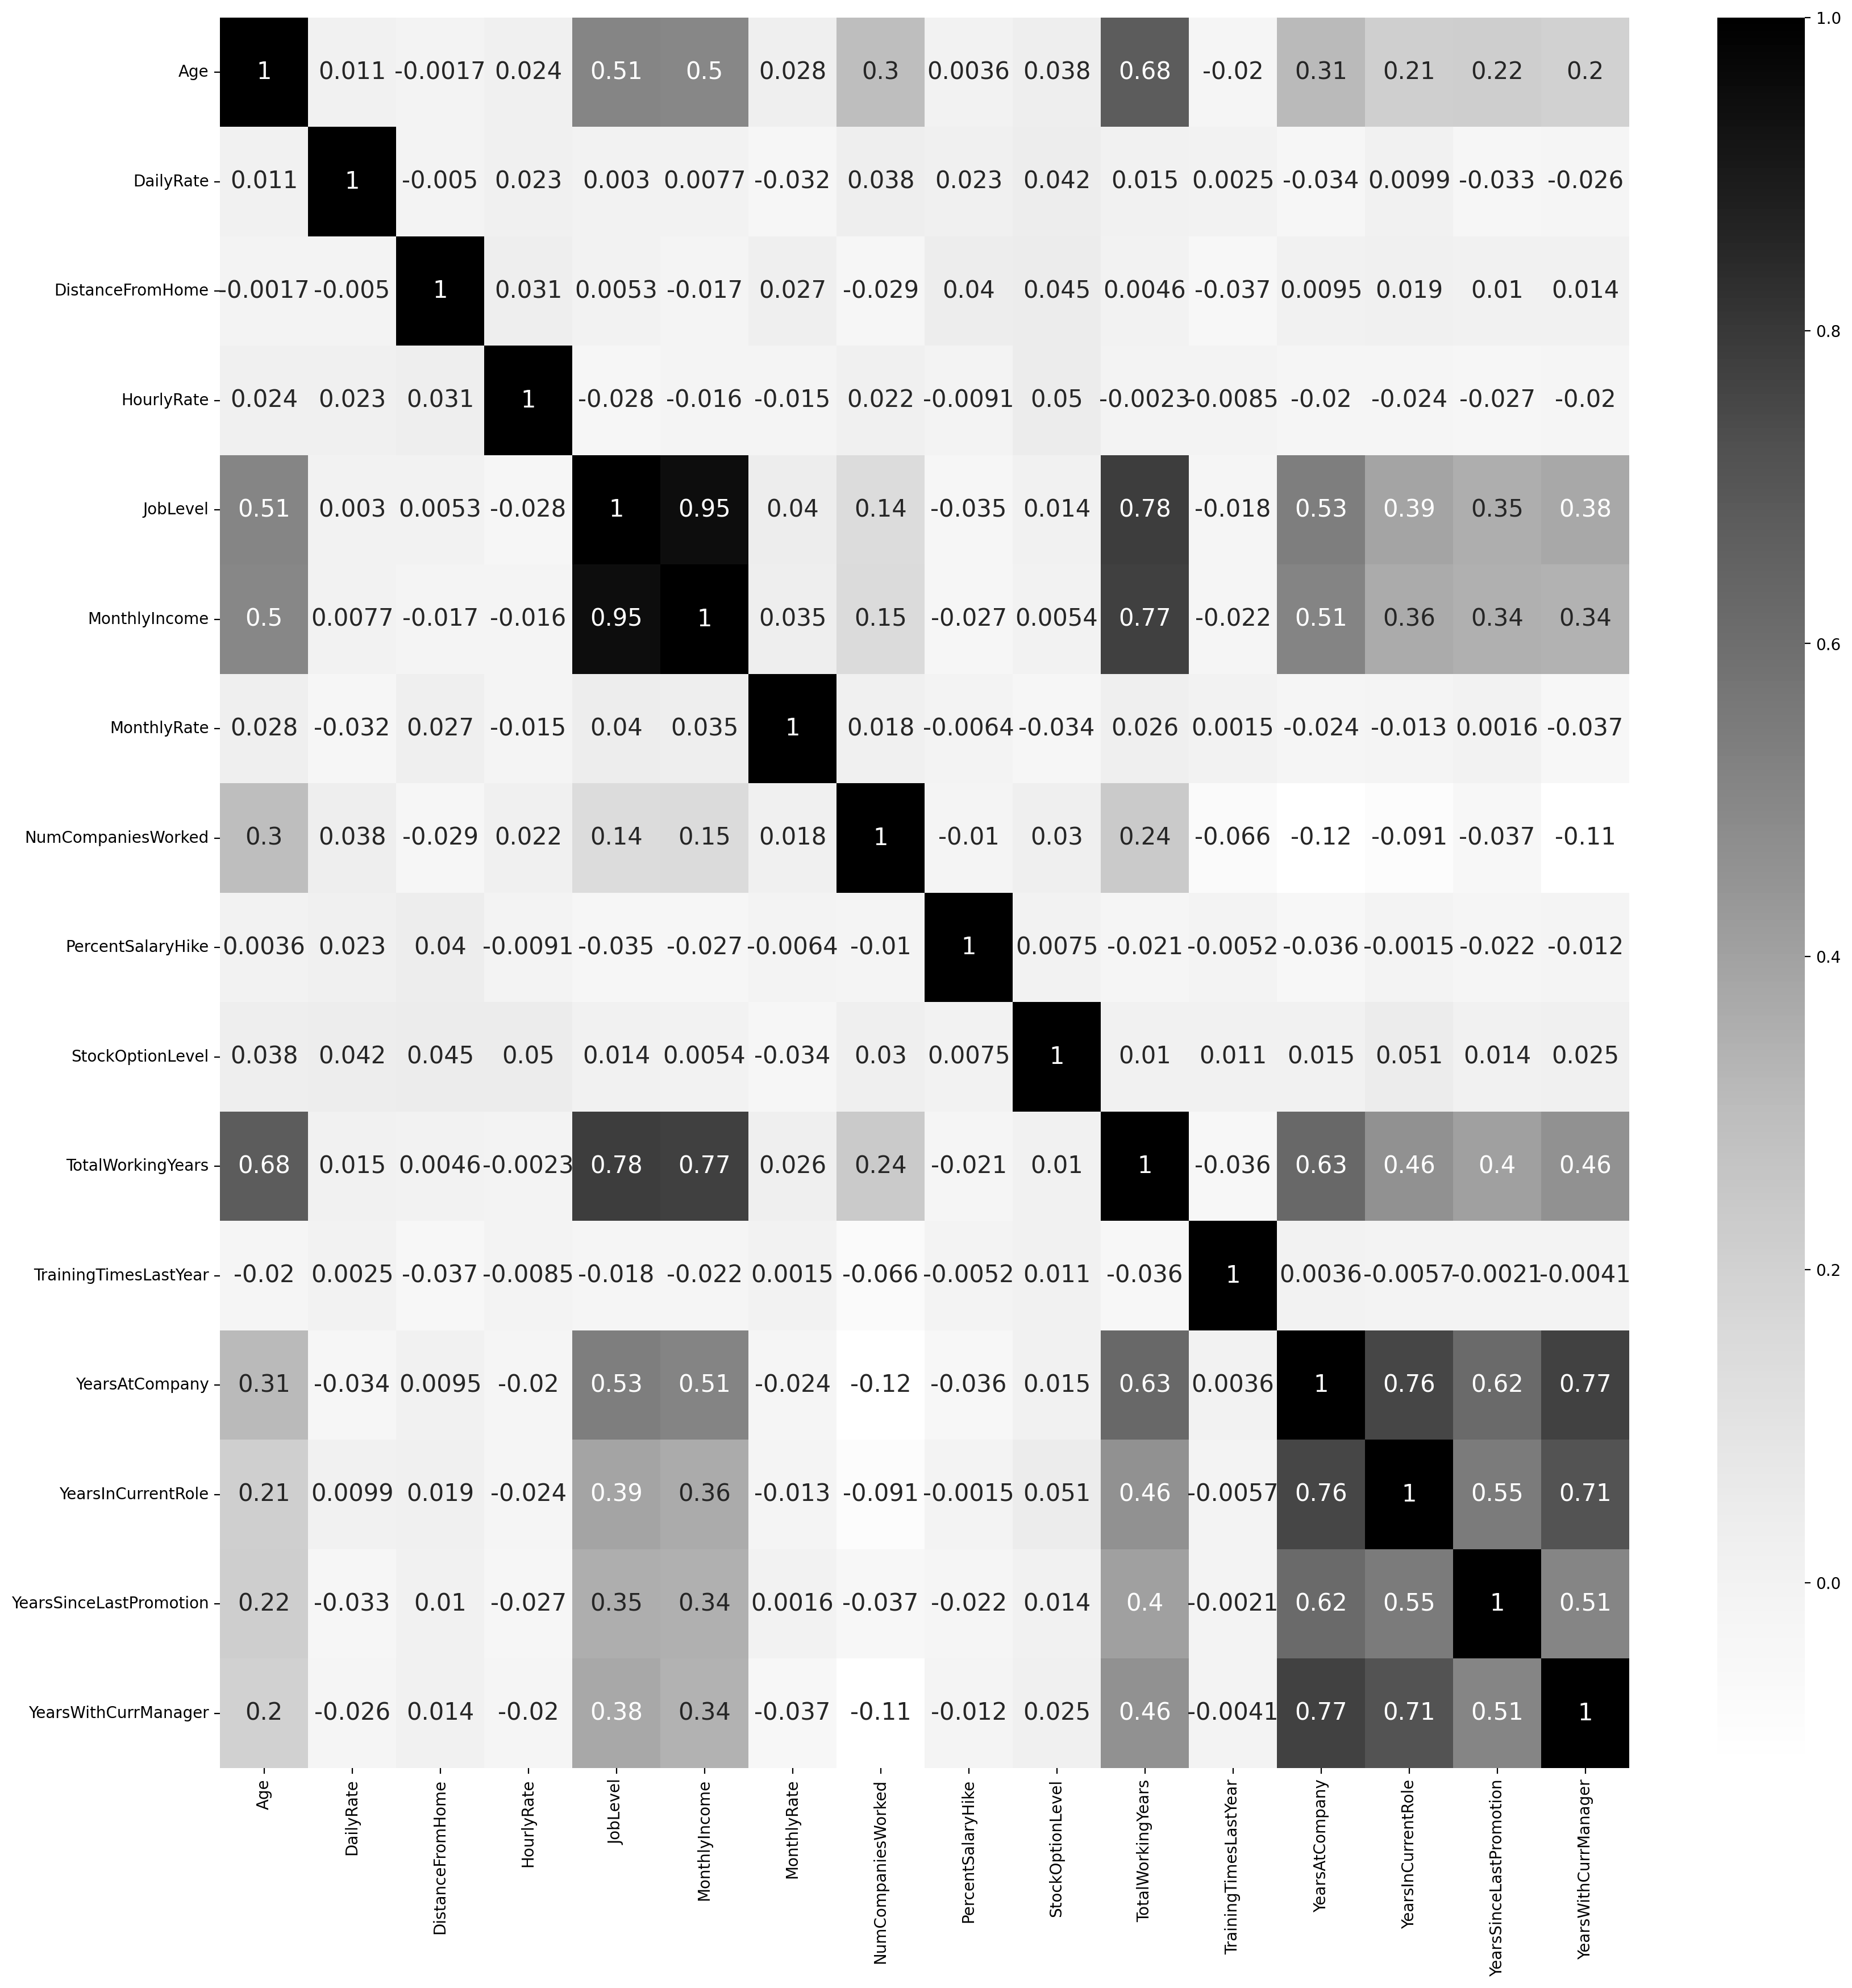

In [242]:
# Filter the DataFrame to include only numeric columns
numeric_columns = df.select_dtypes(include=[int, float])

# Create a correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="Greys", annot_kws={"size": 15})
plt.show()

**Findings of Correlation Analysis;**

    *Time type features (YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and with YearsWithCurrManager) are quite correlated to each other indicated by the bottom right corner green zone.

    *Also, TotalWorkingYears and JobLevel are correlated to MonthlyIncome as you'd imagined.

    *Most other features are not correlated to each other, so we do not have to deal with that right now. As for the time type features, we will consider whether to alter them according to the machine learning model.

### Cross Analysis between Attrition and Numerical Features

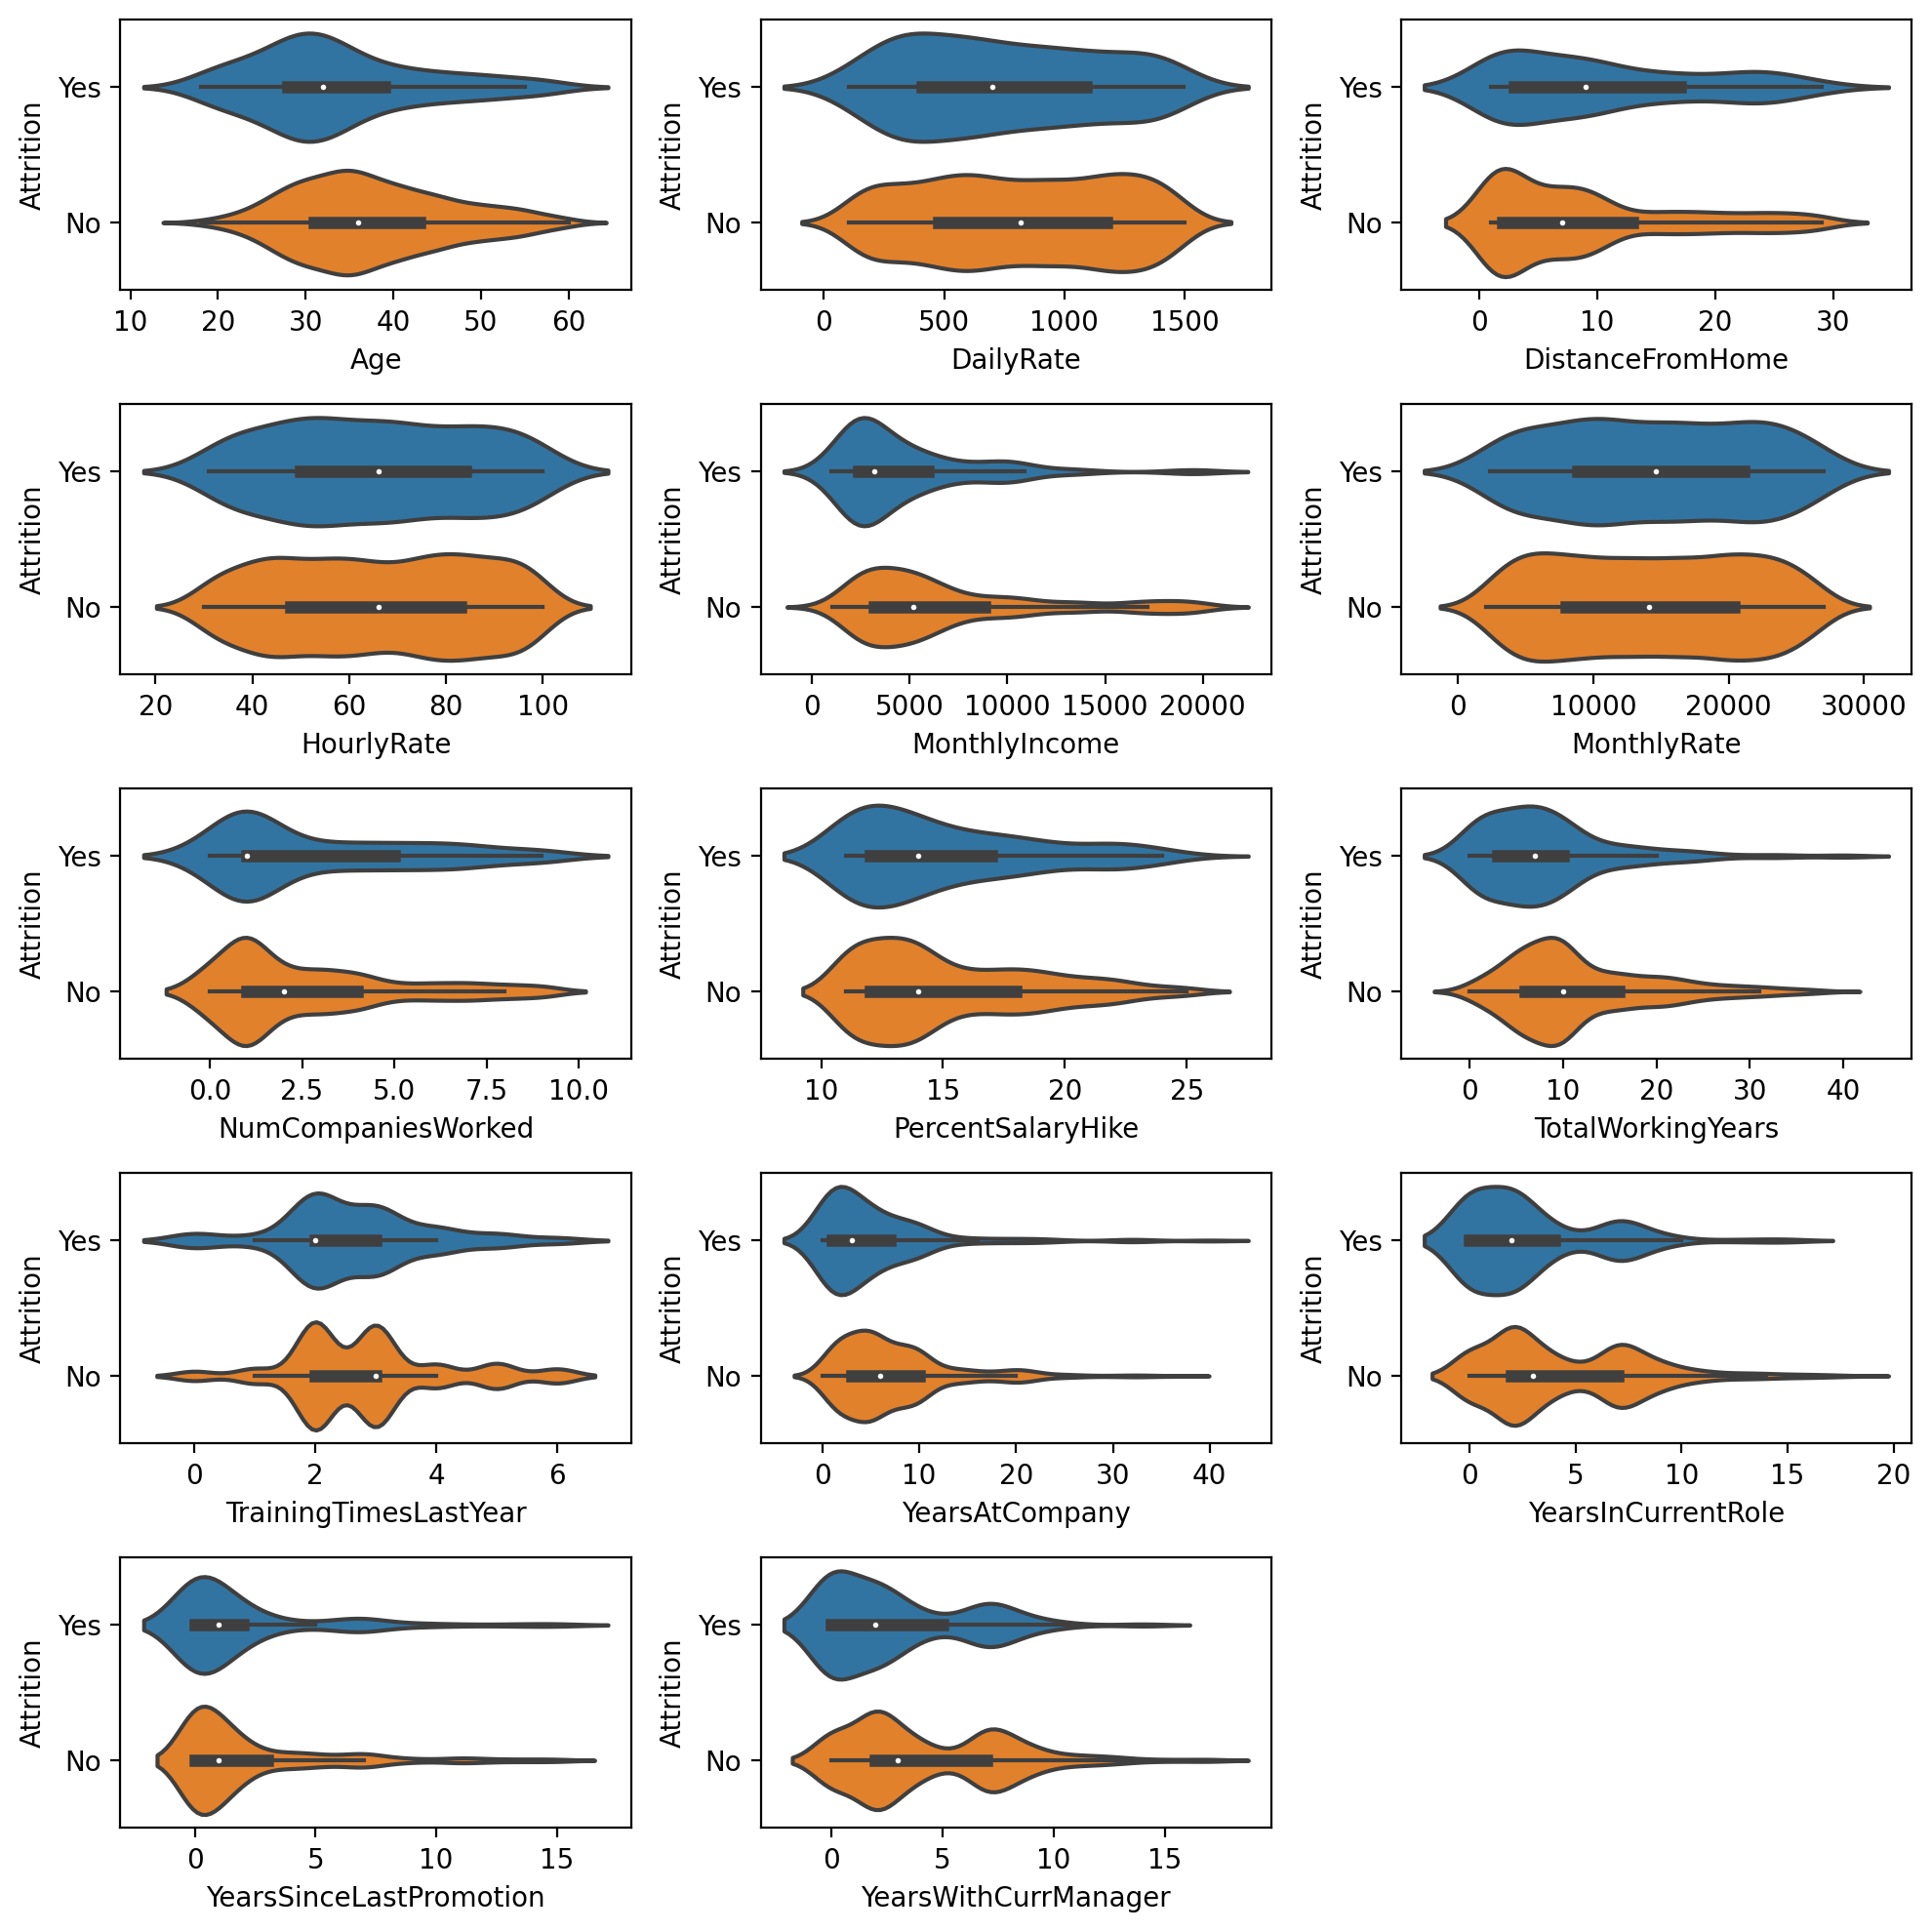

In [243]:
plt.figure(figsize=(10, 10))
for i, column in enumerate(numerical_list, 1):
    plt.subplot(5, 3, i)
    sns.violinplot(data=df, x=column, y='Attrition')
plt.tight_layout()
plt.show()

**Findings of Cross Analysis between Attrition and Numerical Features;**

The above violin graphs indicate the average value of features and similar information like boxplot. These findings are merely based on superficial results whithout consideration of confounding.

With that said, the findings are;

    Age: Younger employees tend to leave compared to older employees.

    DistanceFromHome: Those who live far from company have more possibility to leave.

    MonthlyIncome: Income of most attrition employees is below 5000, while those who's income is higher than 5000 tend to stay.

    NumCompaniesWorked, Time type features: People who worked for many companies and worked for many years are likely to stay.

### Cross Analysis between Attrition and Categorical Features

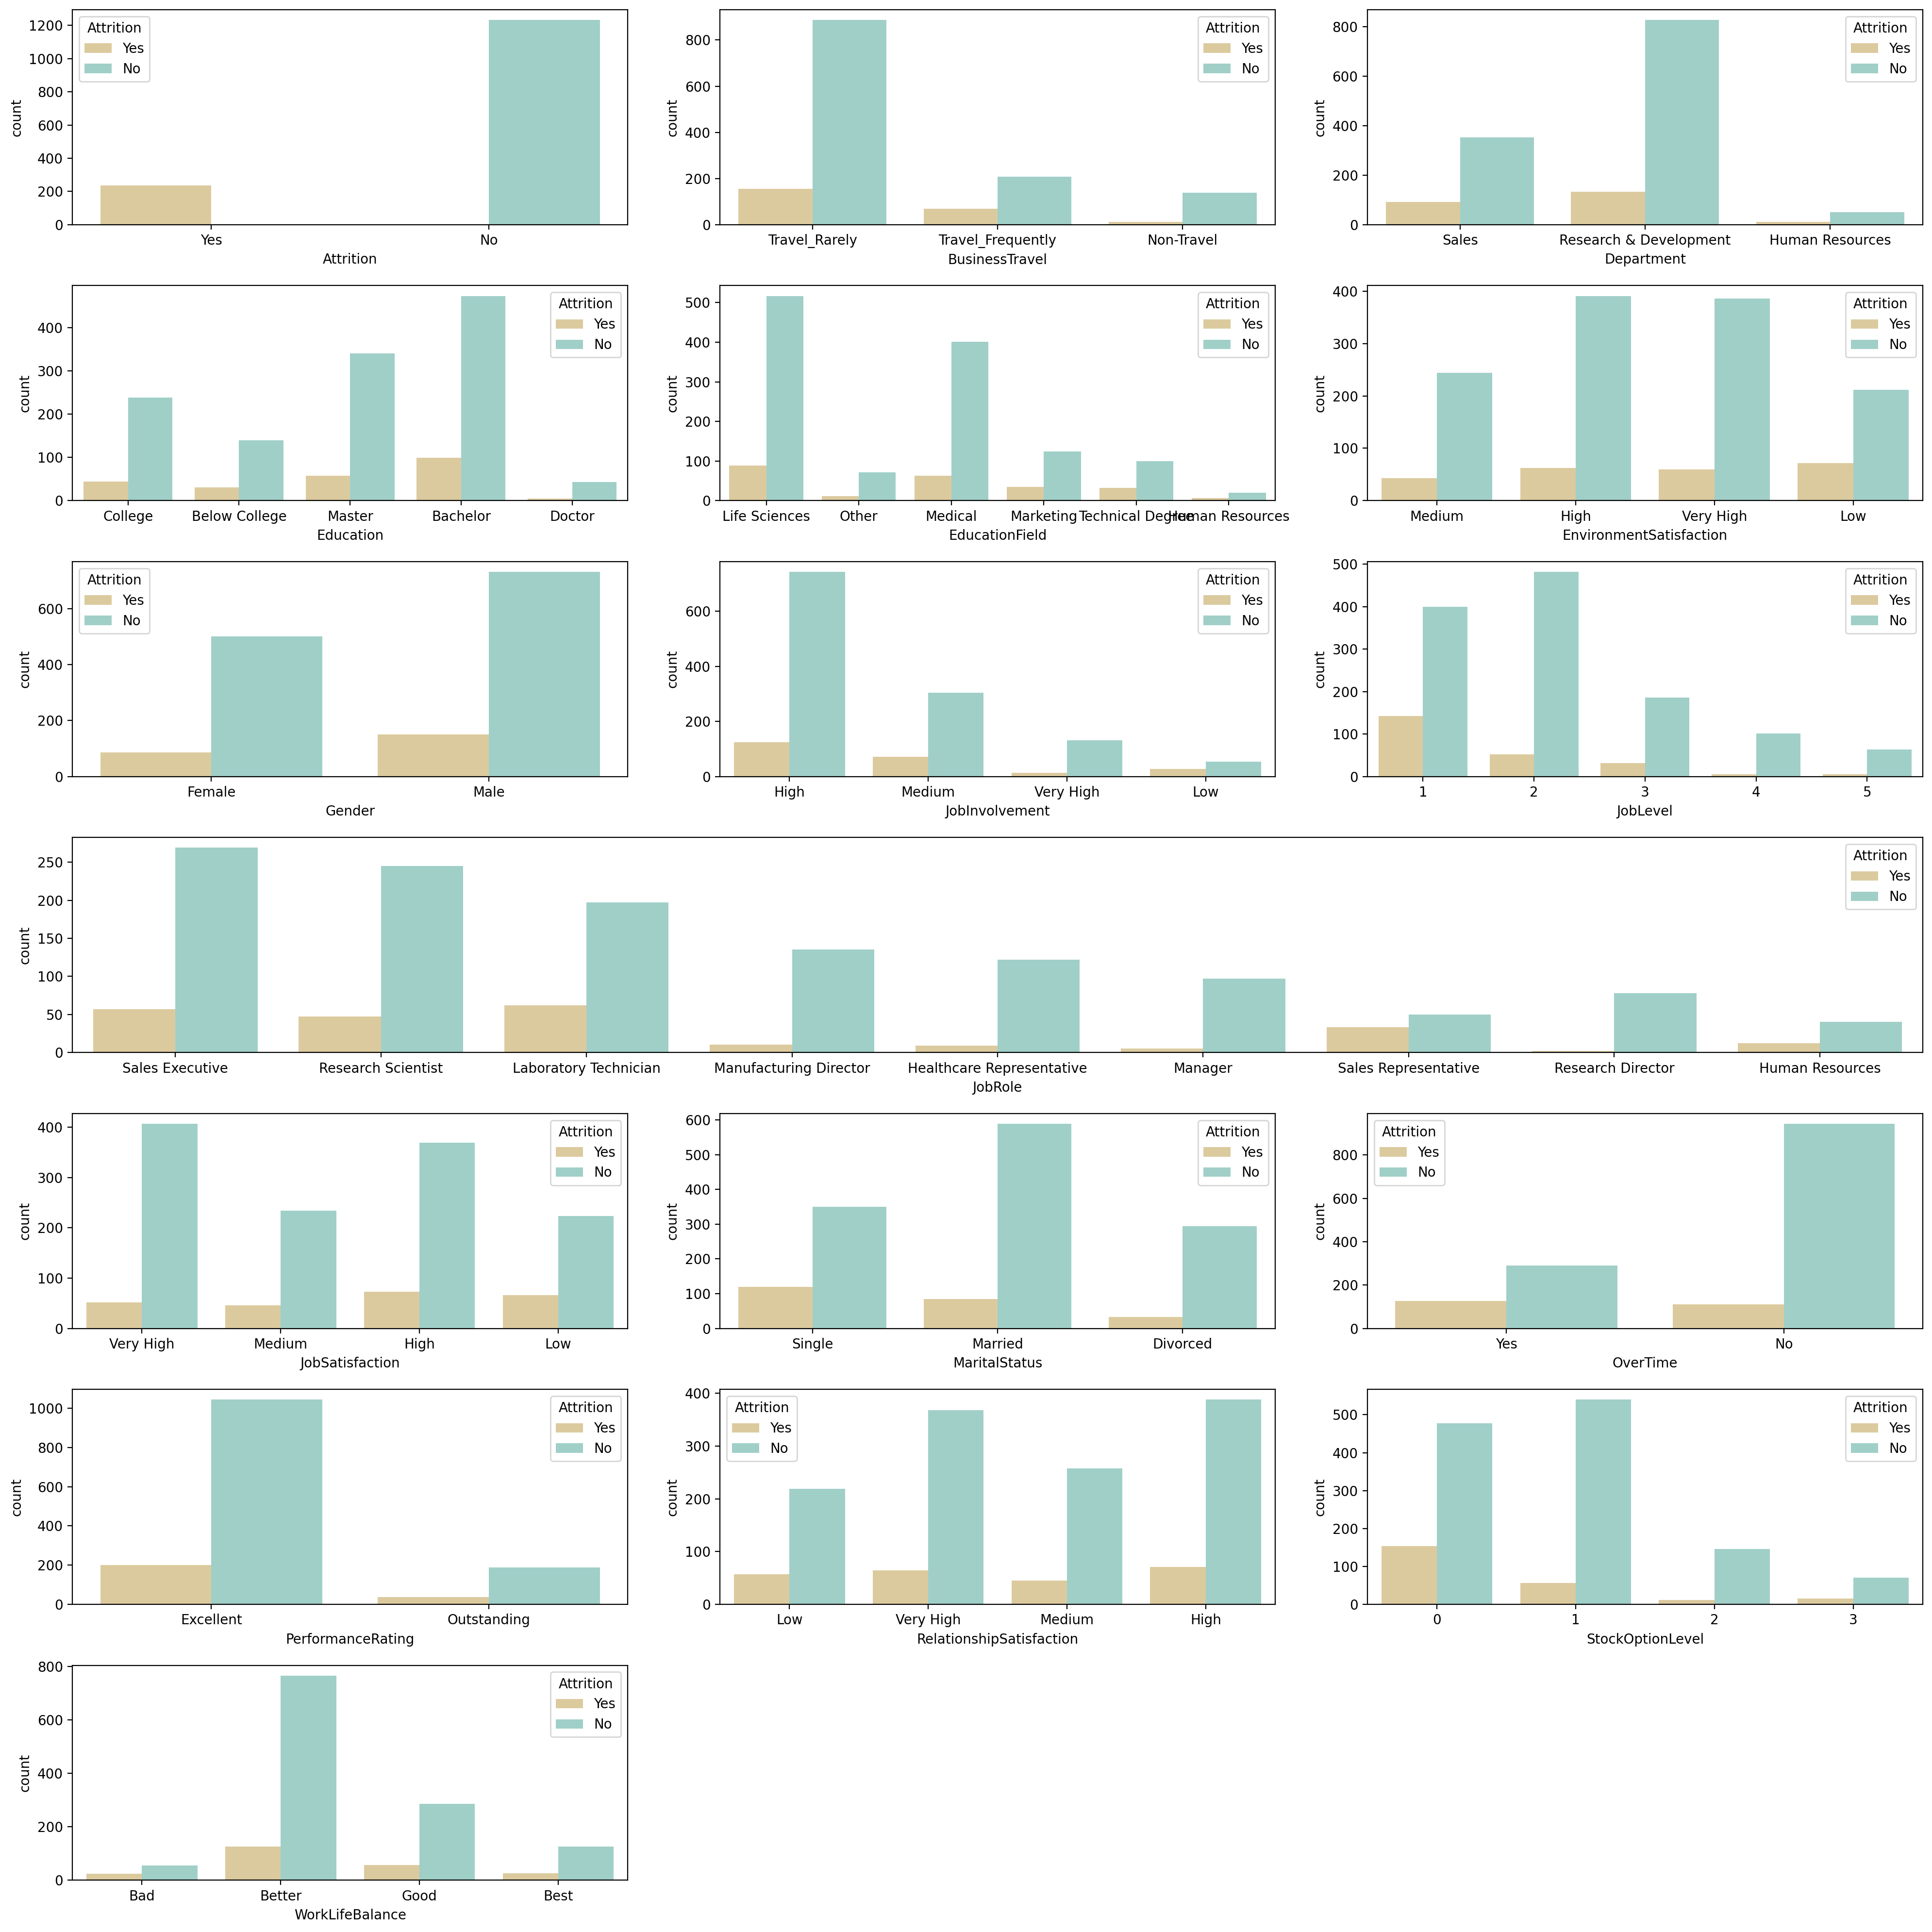

In [244]:
# Create subplots
plt.figure(figsize=(20, 20))
gridspec = plt.GridSpec(7, 3)
locator1, locator2 = [0, 0]

for column in cate_list:
    if column == 'JobRole':
        plt.subplot2grid((7, 3), (locator1, locator2), colspan=3, rowspan=1)
        sns.countplot(x=column, hue='Attrition', data=df, palette='BrBG')
        locator1 += 1
        locator2 = 0
        continue
    plt.subplot2grid((7, 3), (locator1, locator2))
    sns.countplot(x=column, hue='Attrition', data=df, palette='BrBG')
    locator2 += 1
    if locator2 == 3:
        locator1 += 1
        locator2 = 0
        continue
    if locator1 == 7:
        break
plt.tight_layout()
plt.show()

**Findings of Cross Analysis between Attrition and Categorical Features;**

By comparing between different levels among the employees attrition;

    Those who have business travel are more likely leave the company.

    Employees of Human Resource are the most stable group of employees.

    Employees who have a Doctor's degree are stable.

    Enviroment satisfaction is not related a lot to attrition.

    The higher the job level, the less possibility that employess leave.

    Technical employees tend to leave.

    Low performance rating and low stock option level may result employees' attrition.

## Task 2: Feature selection And Importance Analysis

After exploration of data, we need to process these features in order to apply them into machine learning models.

### Preprocessing and Encoding of Categorical Features

**Label all 'object' type of feature as 'integer'**

In [245]:
# Iterate through categorical features
for cate_feature in df.select_dtypes(include='object').columns:
    le = preprocessing.LabelEncoder()
    df[cate_feature] = le.fit_transform(df[cate_feature])

# Now, you can display the encoded DataFrame
df.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0          2               1                        2       0          94   
1          1               1                        0       1          61   
2          2               4                        3       1          92   
3          4               1                        3       0          56   
4          1               3                        1       1          40   

   JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
0               0         2        7                3              2   
1               2         2        6                2              1   
2               2         1        2                0              2   
3               0         1        6                0              1   
4               0         1        2                2              1   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0           5993        19479                   8         1   
1           5130        24907                   1         0   
2           2090         2396                   6         1   
3           2909        23159                   1         1   
4           3468        16632                   9         0   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  0                         1   
1                 23                  1                         3   
2                 15                  0                         2   
3                 11                  0                         0   
4                 12                  0                         3   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                0               6                   4   
1                2              10                   7   
2                2               0                   0   
3                2               8                   7   
4                2               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

**Dummy Nominal Features**

Select those nominal features which have more than two classes as dummy variables.

In [246]:
dummies = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']
df = pd.get_dummies(data=df, columns=dummies)
display(df.head())

Age  Attrition  BusinessTravel  DailyRate  DistanceFromHome  Education  \
0   41          1               2       1102                 1          2   
1   49          0               1        279                 8          1   
2   37          1               2       1373                 2          2   
3   33          0               1       1392                 3          4   
4   27          0               2        591                 2          1   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2       0          94               0         2   
1                        0       1          61               2         2   
2                        3       1          92               2         1   
3                        3       0          56               0         1   
4                        1       1          40               0         1   

   JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0                3           5993        19479                   8         1   
1                2           5130        24907                   1         0   
2                0           2090         2396                   6         1   
3                0           2909        23159                   1         1   
4                2           3468        16632                   9         0   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  0                         1   
1                 23                  1                         3   
2                 15                  0                         2   
3                 11                  0                         0   
4                 12                  0                         3   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                0               6                   4   
1                2              10                   7   
2                2               0                   0   
3                2               8                   7   
4                2               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  Department_0  Department_1  \
0                        0                     5         False         False   
1                        1                     7         False          True   
2                        0                     0         False          True   
3                        3                     0         False          True   
4                        2                     2         False          True   

   Department_2  EducationField_0  EducationField_1  EducationField_2  \
0          True             False              True             False   
1         False             False              True             False   
2         False             False             False             False   
3         False             False              True             False   
4         False             False             False             False   

   EducationField_3  EducationField_4  EducationField_5  JobRole_0  JobRole_1  \
0             False             False             False      False      False   
1             False             False             False      False      False   
2             False              True             False      False      False   
3             False             False             False      False      False   
4              True             False             False      False      False   

   JobRole_2  JobRole_3  JobRole_4  JobR

### Preprocessing and Encoding of Numerical Features

**Scaling Numerical Features**

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

Z=(X−μ)/S

In [247]:
std = preprocessing.StandardScaler()
scaled = std.fit_transform(df[numerical_list])
scaled = pd.DataFrame(scaled, columns=numerical_list)

display(scaled.head())

Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  \
0  0.446350   0.742527         -1.010909    1.383138      -0.108350   
1  1.322365  -1.297775         -0.147150   -0.240677      -0.291719   
2  0.008343   1.414363         -0.887515    1.284725      -0.937654   
3 -0.429664   1.461466         -0.764121   -0.486709      -0.763634   
4 -1.086676  -0.524295         -0.887515   -1.274014      -0.644858   

   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0     0.726020            2.125136          -1.150554          -0.421642   
1     1.488876           -0.678049           2.129306          -0.164511   
2    -1.674841            1.324226          -0.057267          -0.550208   
3     1.243211           -0.678049          -1.150554          -0.421642   
4     0.325900            2.525591          -0.877232          -0.678774   

   TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
0              -2.171982       -0.164613           -0.063296   
1               0.155707        0.488508            0.764998   
2               0.155707       -1.144294           -1.167687   
3               0.155707        0.161947            0.764998   
4               0.155707       -0.817734           -0.615492   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                -0.679146              0.245834  
1                -0.368715              0.806541  
2                -0.679146             -1.155935  
3                 0.252146             -1.155935  
4                -0.058285             -0.595227

## Task 3: Model Building

After dummy process and standardized numerical feature. We split the data set into training set and test set with ratio 8:2. 

Moreover, this report used Grid search which is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. This is significant as the performance of the entire model is based on the hyper parameter values specified. 
	First, we choose some of the classifying machine learning models as candidates. 
	We put a customized list of parameters into grid to search out an optimized model under cv equals to 5. 
	Then apply this trained model to the test set. 
	Evaluate the performance and compare them between different models.

In [248]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from subprocess import call
from IPython.display import Image 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

Define a function to output the confusion matrix after building the model.

In [249]:
def my_confusion_matrix(test, test_pred):
    cf = pd.DataFrame(confusion_matrix(test, test_pred), 
                      columns=['Predicted NO', 'Predicted Yes'], 
                      index=['True No', 'True Yes'])
    report = pd.DataFrame(classification_report(test, test_pred, target_names=['No', 'Yes'], 
                                                        output_dict=True)).round(2).transpose()
    display(cf)
    display(report)

In [250]:
def plot_roc_curve(model, y, x):
    tree_auc = roc_auc_score(y, model.predict(x))
    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(x)[:,1])
    plt.figure(figsize=(15, 10))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Decision Tree ROC curve (area = %0.2f)' % tree_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.fill_between(fpr, tpr, color='orange', alpha=0.2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

**Split the data set into traning set and test set with ratio 8:2**

In [251]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Decision Tree

In [252]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [253]:
params = {"criterion": ("gini", "entropy"), 
          "splitter": ("best", "random"), 
          "max_depth": np.arange(1, 20), 
          "min_samples_split": [2, 3, 4], 
          "min_samples_leaf": np.arange(1, 20)}
tree1_grid = GridSearchCV(DecisionTreeClassifier(random_state=100), params, scoring="roc_auc", n_jobs=-1, cv=5)
tree1_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='roc_auc')

**Optimized Model**

In [254]:
print(tree1_grid.best_score_)
print(tree1_grid.best_params_)
print(tree1_grid.best_estimator_)

0.7621052654279763
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 17, 'min_samples_split': 2, 'splitter': 'random'}
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=17,
                       random_state=100, splitter='random')


**Decision Tree Graph**

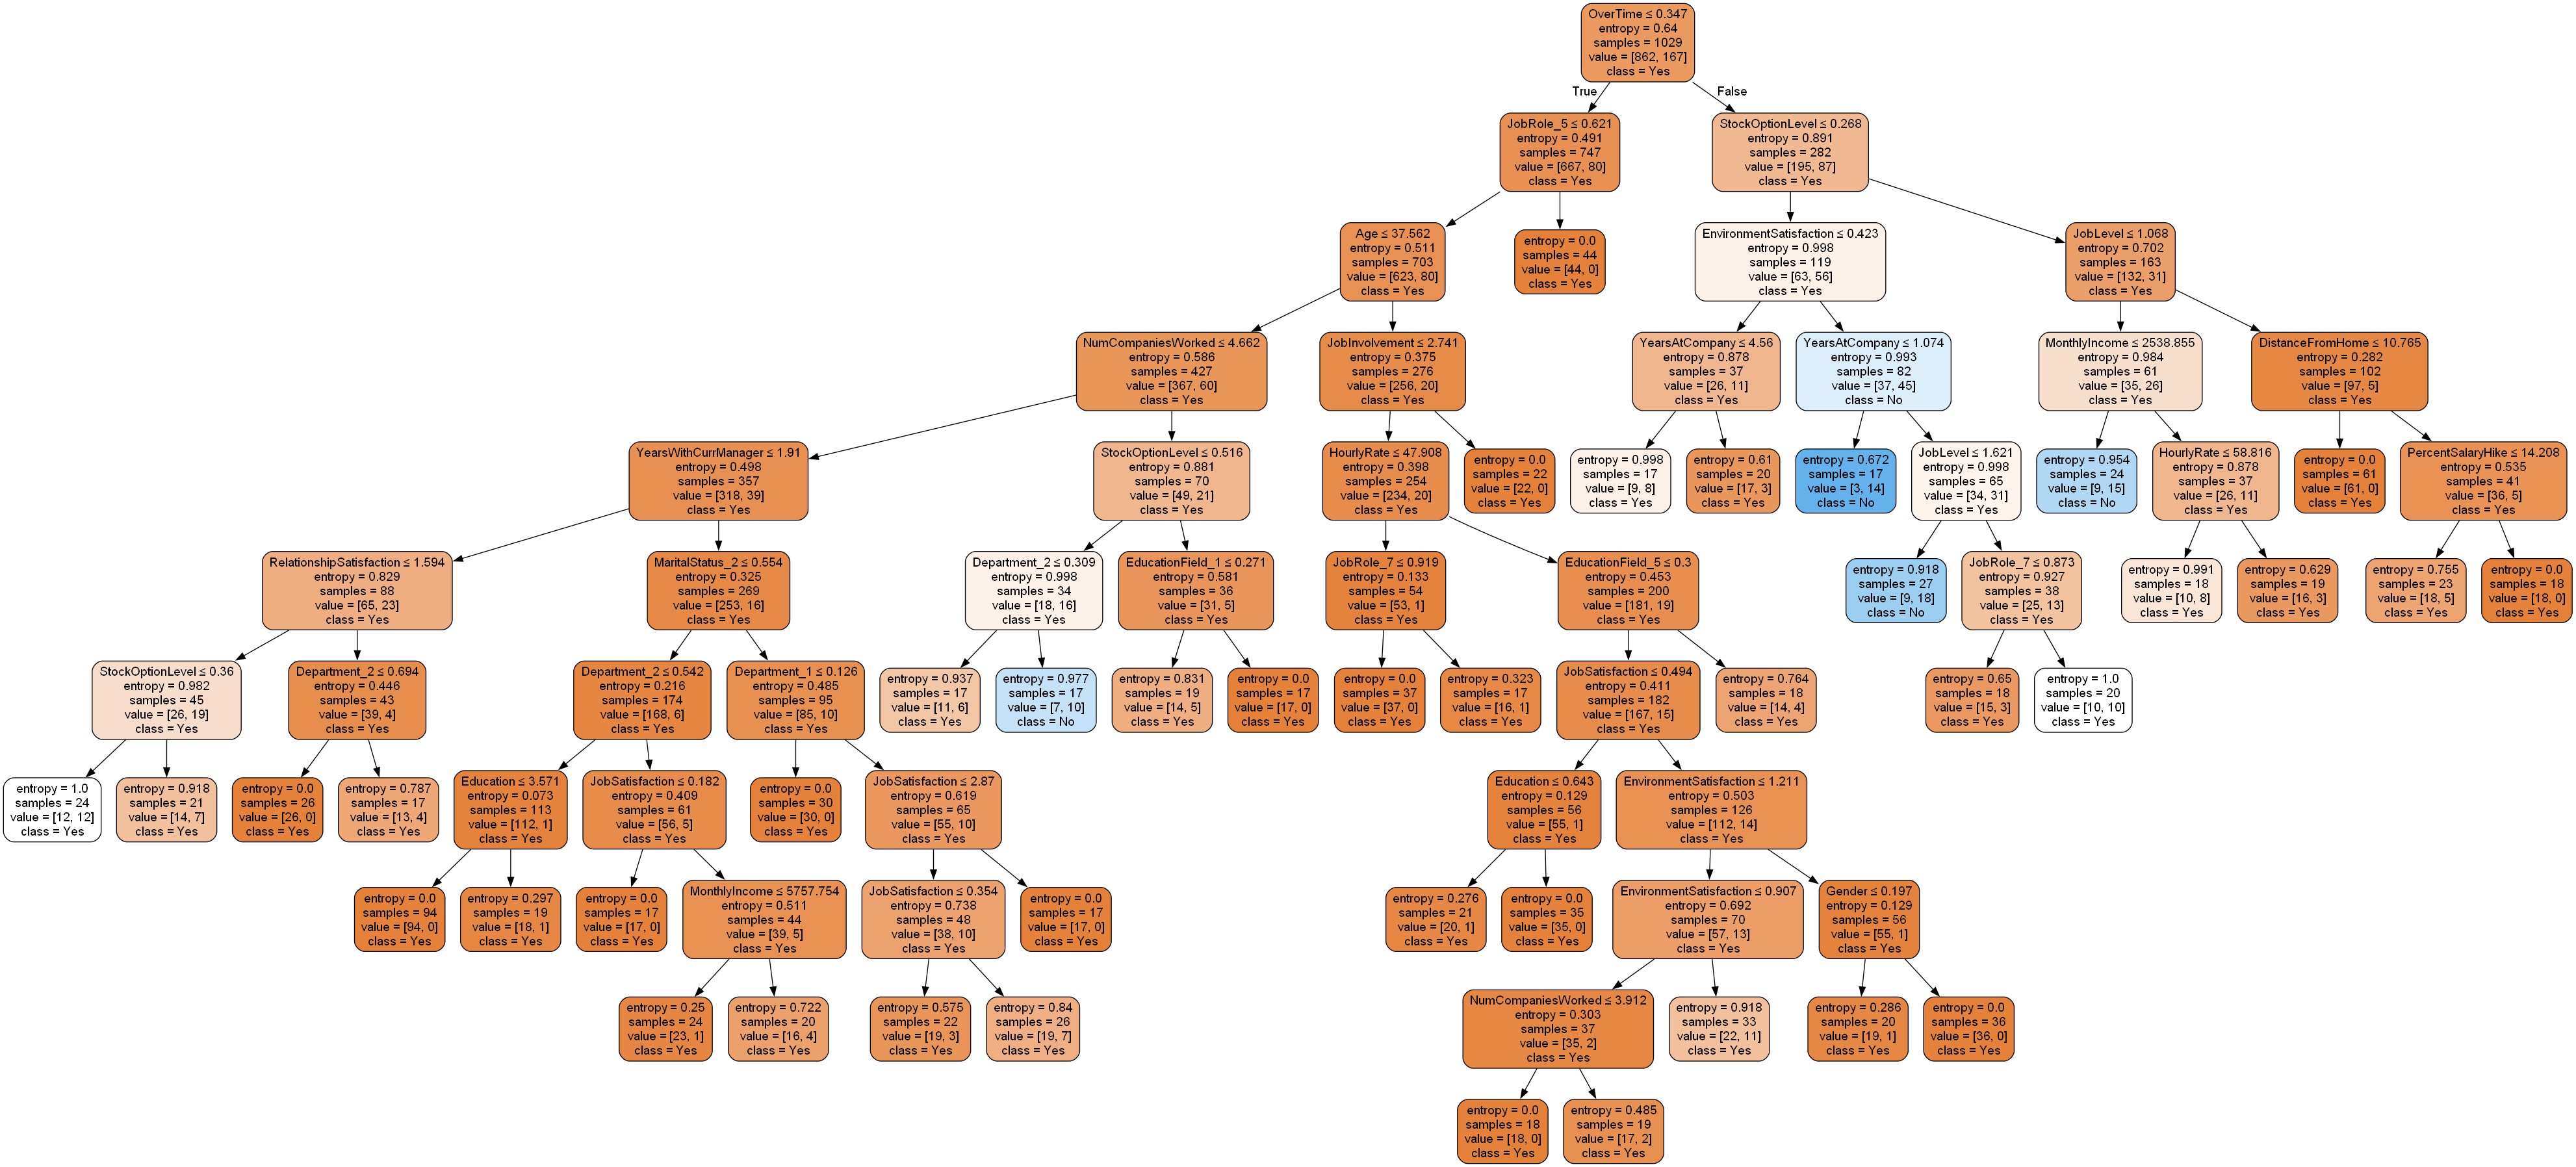

In [255]:
tree1_clf = DecisionTreeClassifier(random_state=0, **tree1_grid.best_params_)
tree1_clf.fit(X_train, y_train)
tree.export_graphviz(tree1_clf, out_file='images/tree1.dot', special_characters=True, rounded = True, filled= True,
                     feature_names=X.columns, class_names=['Yes', 'No'])
call(['dot', '-T', 'png', 'images/tree1.dot', '-o', 'images/tree1.png'])
display(Image("images/tree1.png", height=2000, width=1900))

## Task 4: Model Training, Testing and Evaluation

**Results of Test Set**

In [256]:
y_test_pred_tree1 = tree1_clf.predict(X_test)
my_confusion_matrix(y_test, y_test_pred_tree1) # Defined before
tree1_auc = roc_auc_score(y_test, y_test_pred_tree1)
print("AUC:", tree1_auc)

Predicted NO  Predicted Yes
True No            357             14
True Yes            52             18

precision  recall  f1-score  support
No                 0.87    0.96      0.92   371.00
Yes                0.56    0.26      0.35    70.00
accuracy           0.85    0.85      0.85     0.85
macro avg          0.72    0.61      0.63   441.00
weighted avg       0.82    0.85      0.83   441.00

AUC: 0.6097035040431267


Summary:

    The model performs reasonably well in correctly predicting the negative class ("No") with high precision (0.87) and recall (0.96). For employees who didn't leave (class No), the precision is high at 0.87, meaning that when the model predicts that an employee will stay, it's correct 87% of the time.

    However, it's moderate or struggles a bit with the positive class ("Yes") with a moderate precision (0.56) and recall (0.26), indicating that it often misclassifies positive instances. For employees who did leave (class Yes), the precision is lower at 0.56, indicating that when the model predicts attrition, it's correct 56% of the time.

    The overall accuracy is 0.85, but it's important to note that accuracy can be misleading when dealing with imbalanced datasets.

    Recall (0.96 for class No and 0.26 for class Yes):

        Recall measures the ability of the model to correctly identify positive instances. For employees who didn't leave, the recall is high at 0.96, indicating that the model correctly identifies 94% of employees who stayed.

        For employees who did leave, the recall is lower at 0.26, suggesting that the model only captures 26% of employees who actually left.

    The AUC suggests that the model's ability to distinguish between classes is limited.

In summary, the model has some strengths in predicting the negative class but struggles with the positive class. Further analysis and potentially model improvement may be needed, especially if correctly identifying positive instances (high recall for "Yes") is crucial for the task at hand.

**Importance of Features**

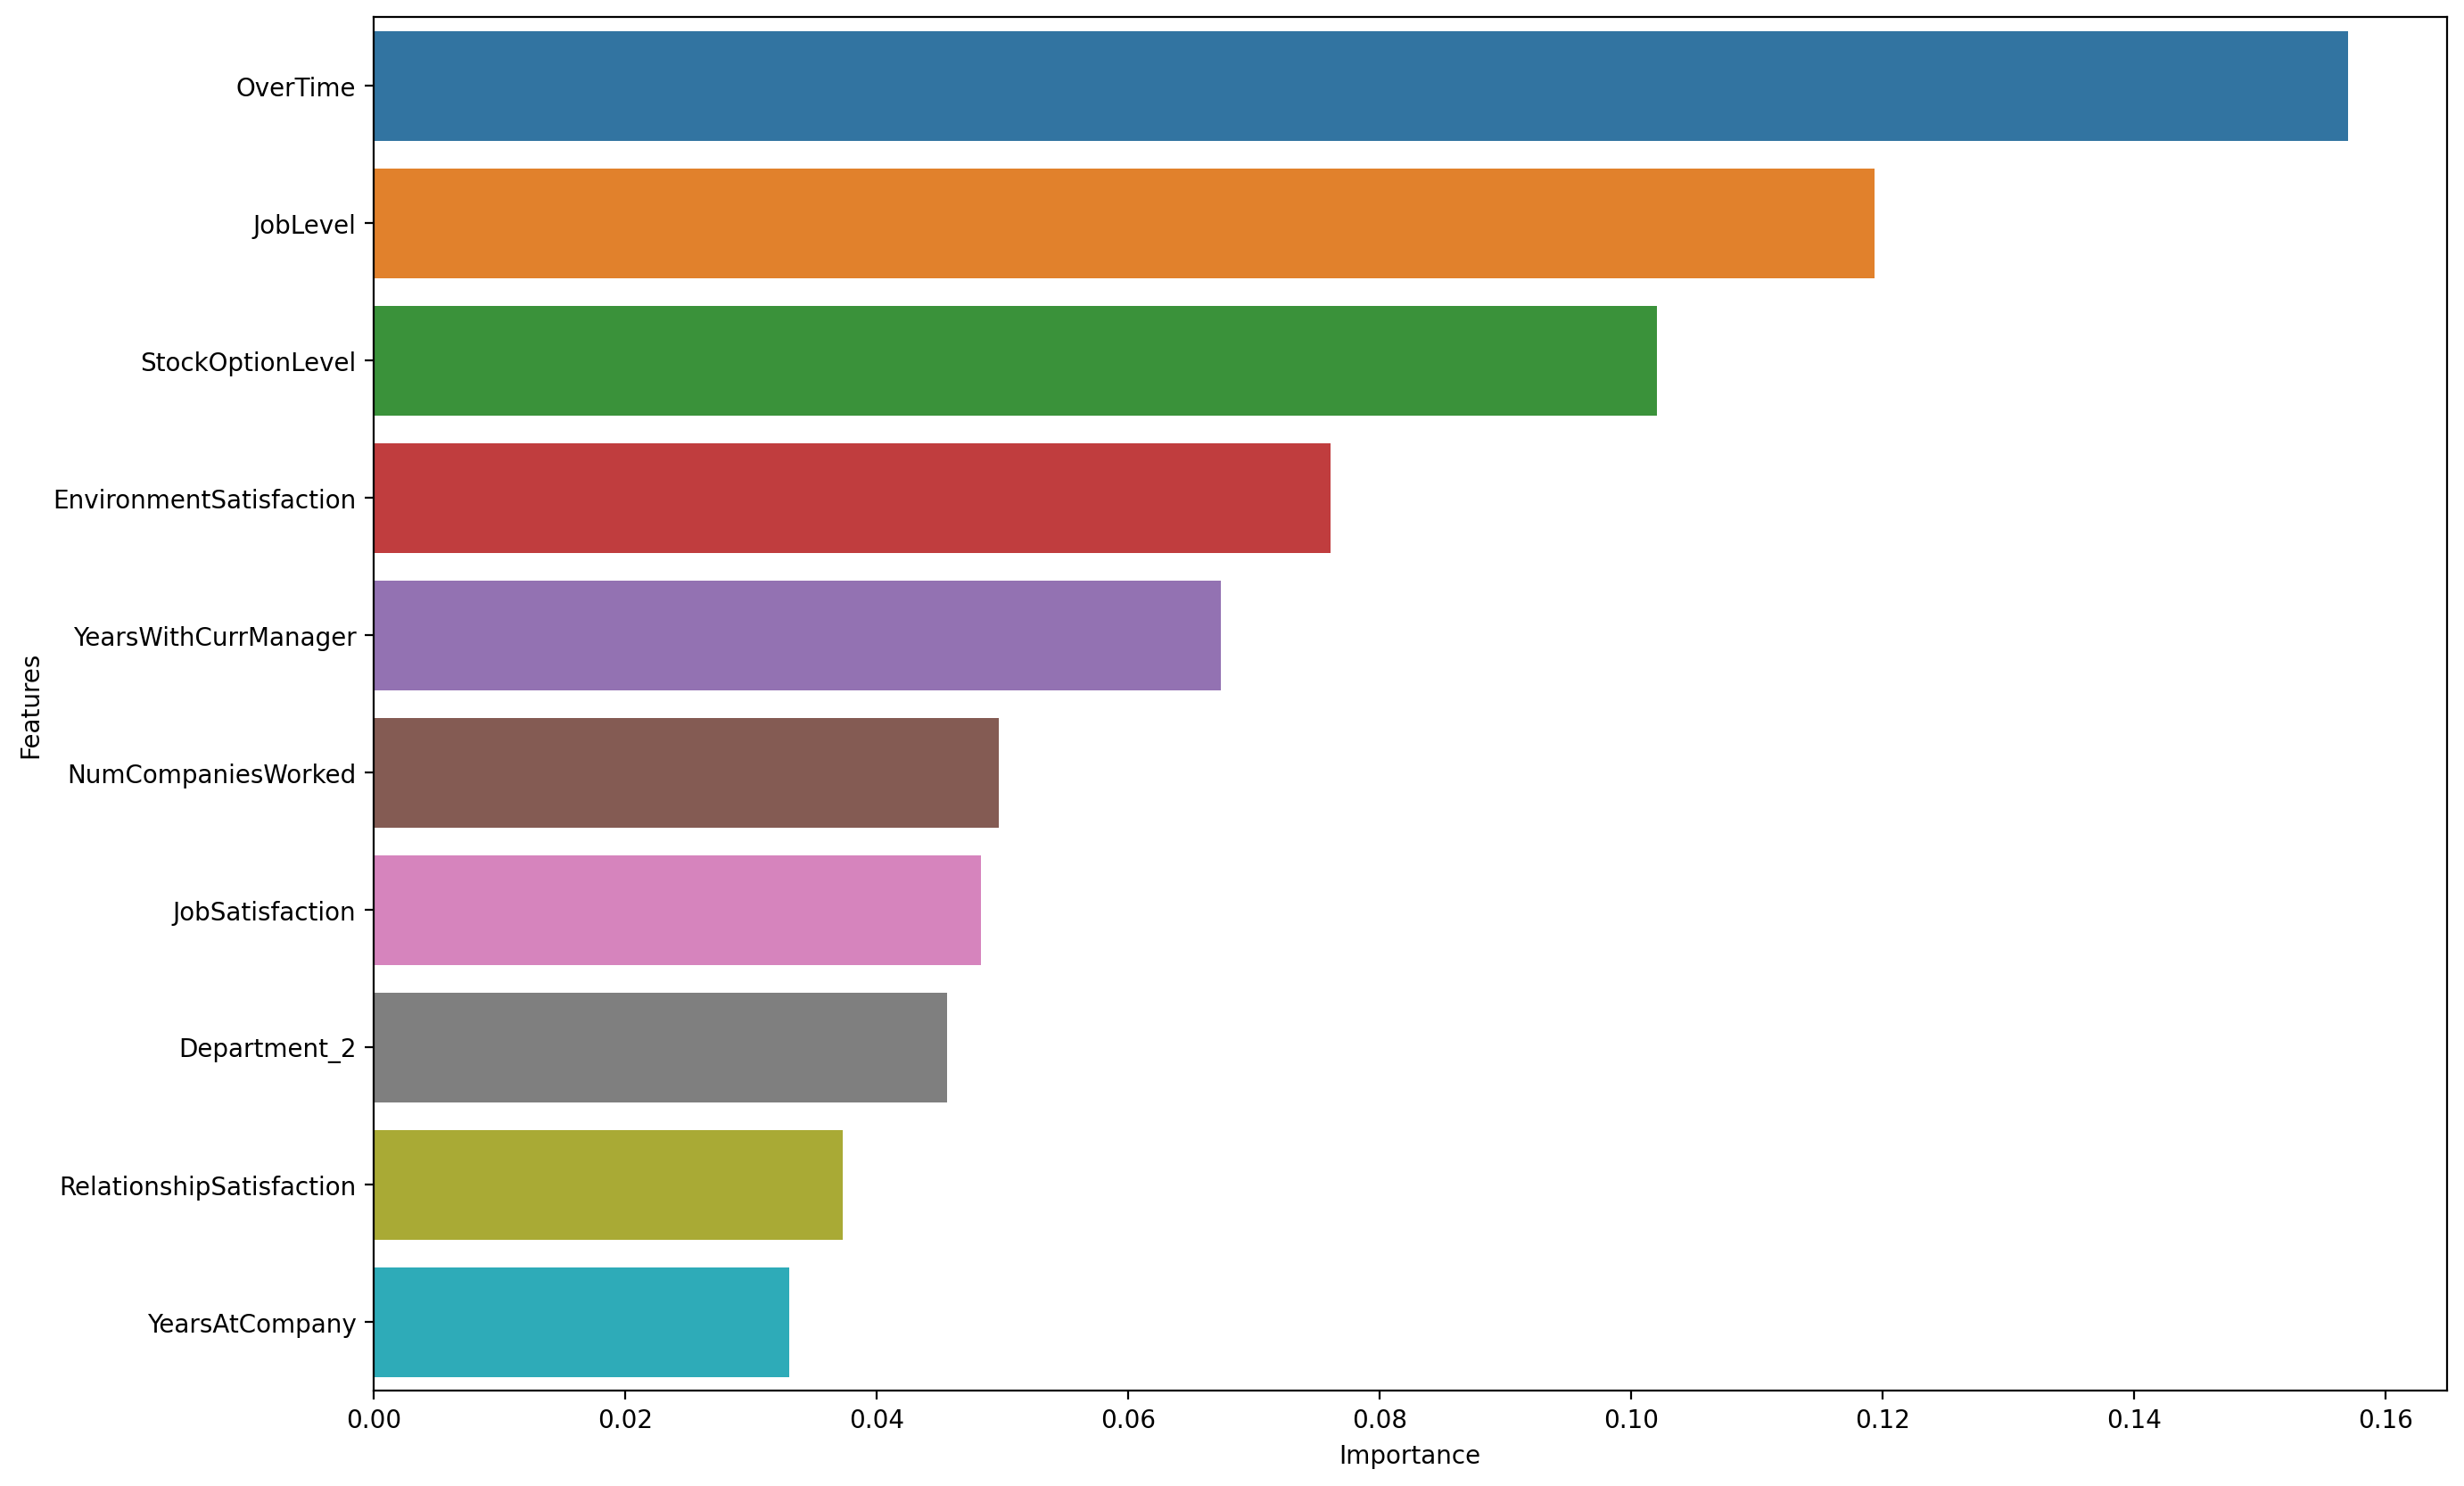

In [257]:
IP = pd.DataFrame({"Features": np.array(X.columns), "Importance": tree1_clf.feature_importances_})
IP = IP.sort_values(by=['Importance'], ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Features', data=IP[:10])
plt.show()

**ROC curve**

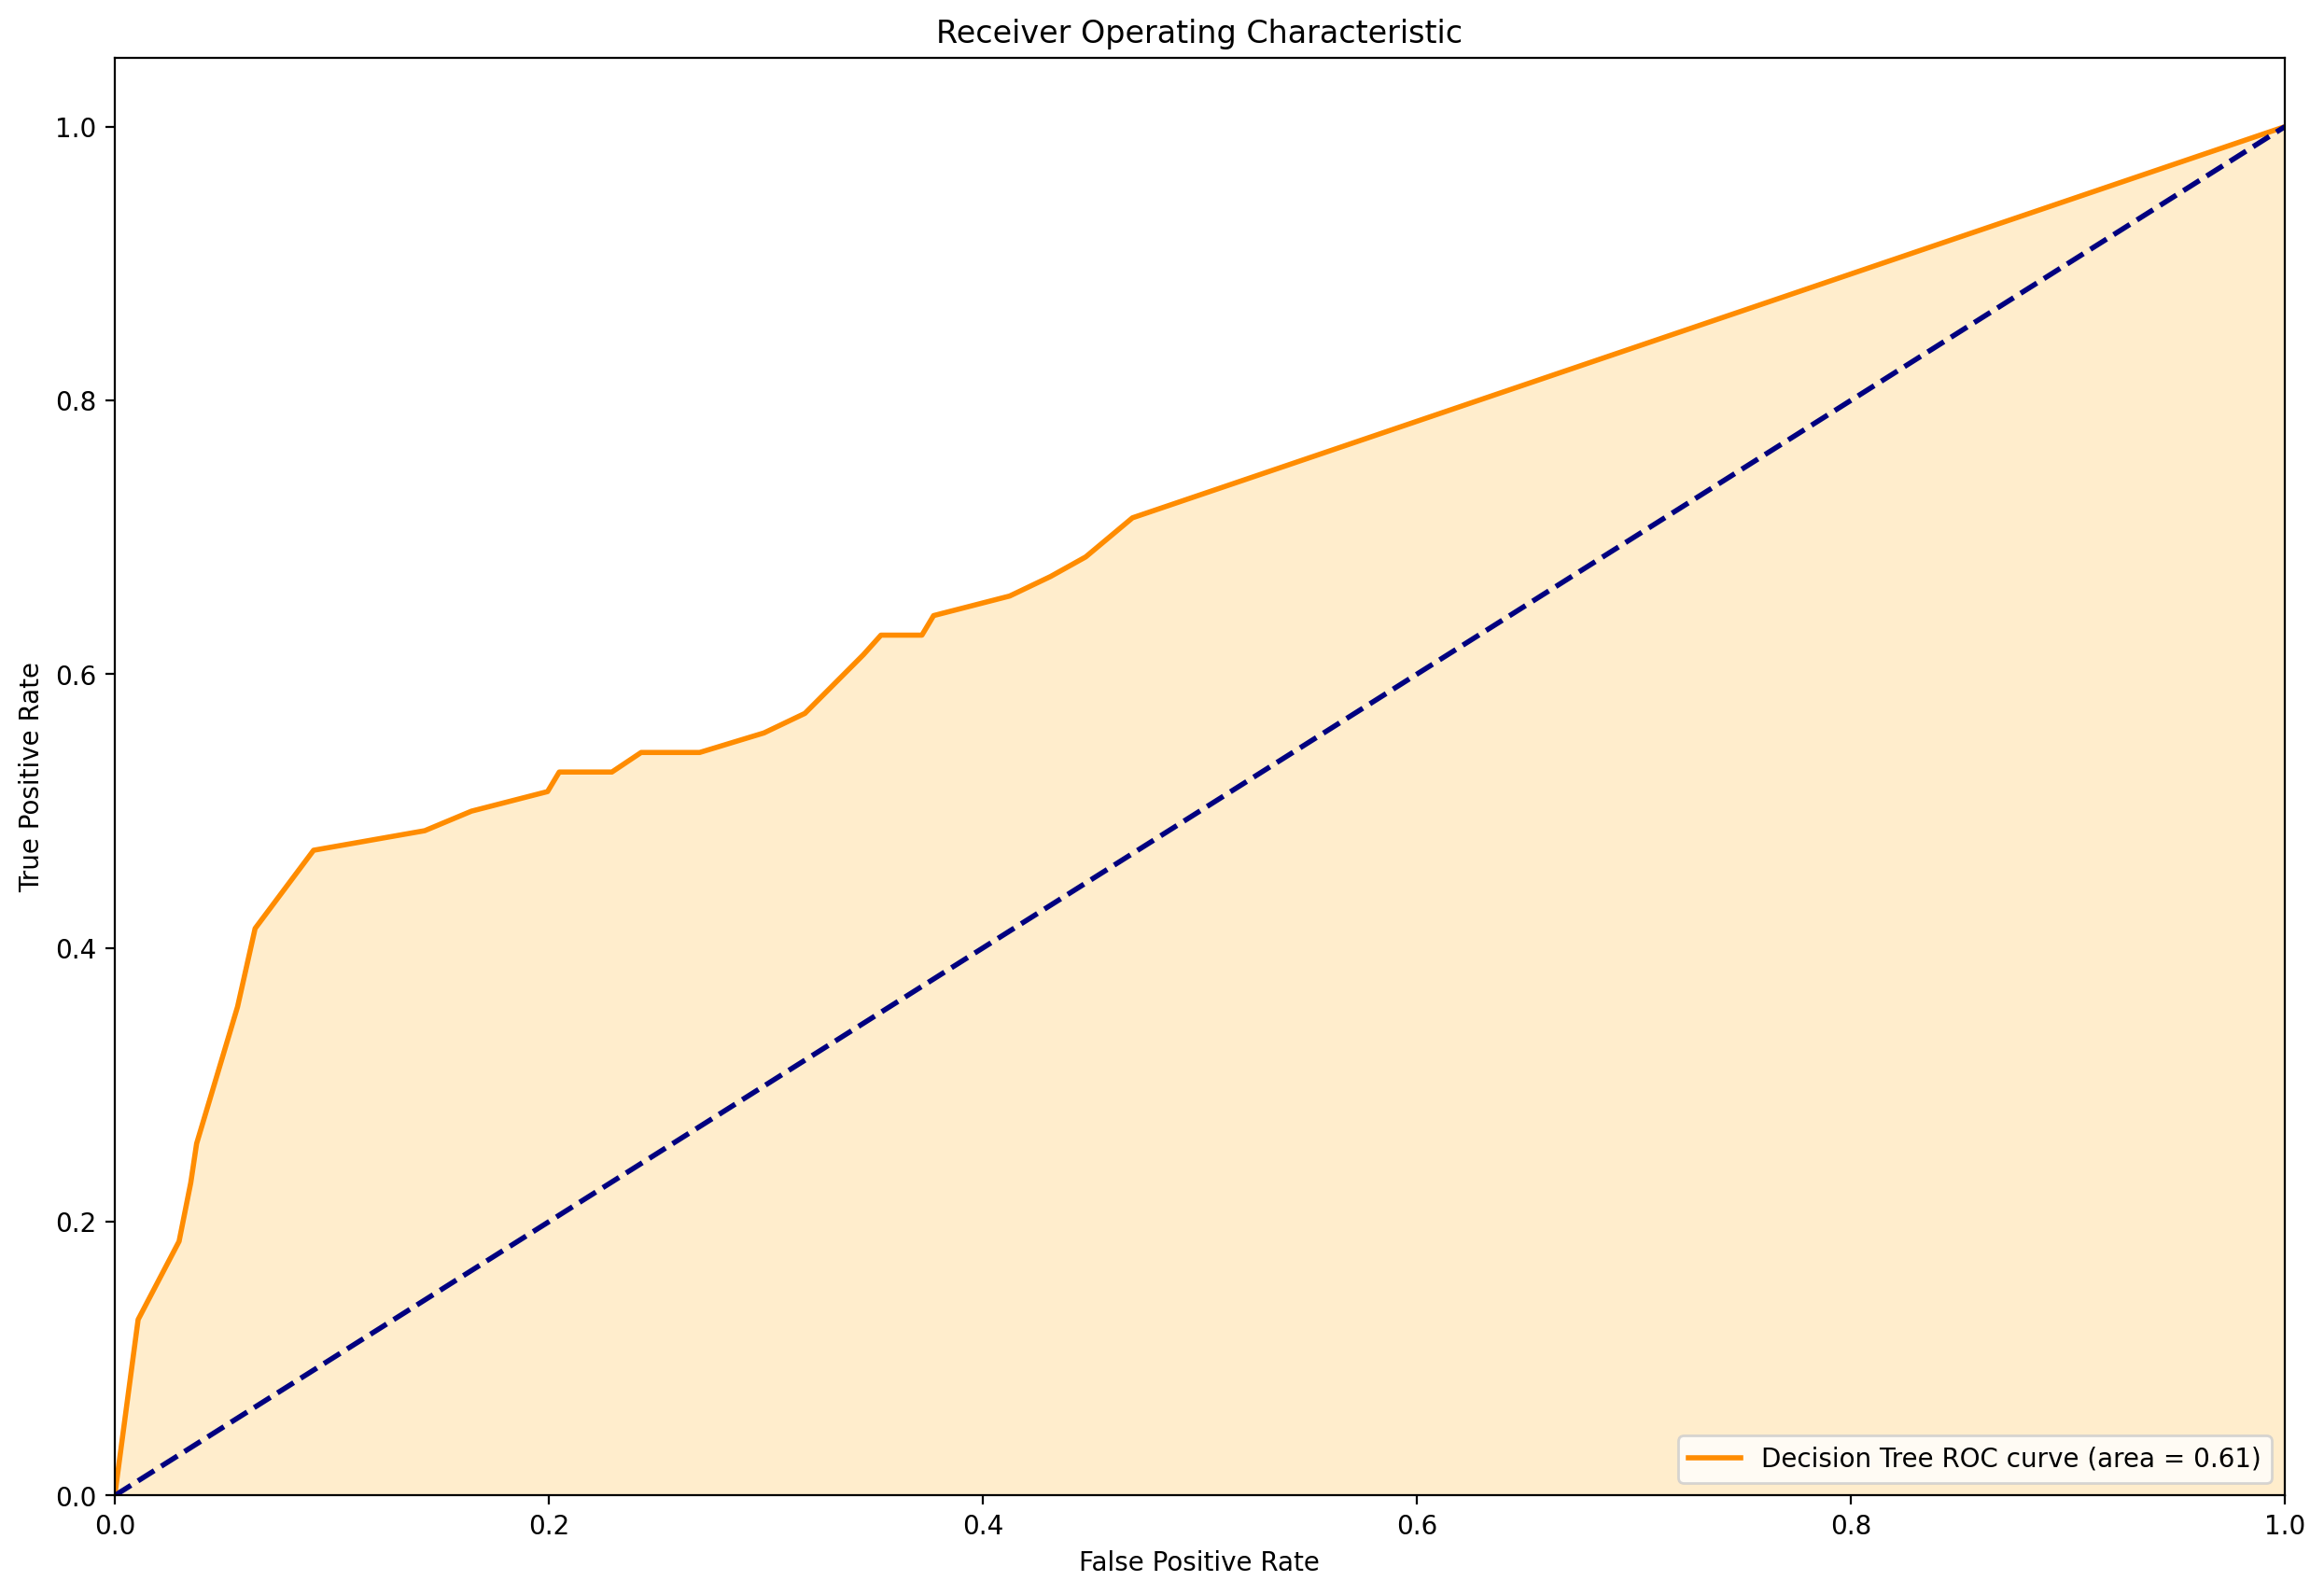

In [258]:
plot_roc_curve(tree1_clf, y_test, X_test)
plt.show()

Because in a company, attrition will cause much more loss than doing something to retain employees. So, whether we can distinguish all employees who want to leave is significant. Hence, we need to consider the AUC value and recall rate for ‘Yes’ class. As for feature importance acquired from SVM, working overtime is the most significant reason to attrion. Then, Laboratory Technician and Sales Representative roles have more possibility to leave. Besides those, those who’s education background is human resource also tend to leave more frequently.